In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson, probplot, multivariate_normal, chi2
from pingouin import multivariate_normality
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/crisb-7/Mercurio/main/mercurio.csv"

columnNames = ["ID", "Lago", "Alcalinidad", "pH", "Calcio", "Clorofila", "Mercurio", 
               "N_Peces", "MinMercurio", "MaxMercurio", "Estimacion", "Edad"]

df = pd.read_csv(url, names = columnNames, header = 0)

In [3]:
df.head()

ID          Lago  Alcalinidad   pH  Calcio  Clorofila  Mercurio  N_Peces  \
0   1     Alligator          5.9  6.1     3.0        0.7      1.23        5   
1   2         Annie          3.5  5.1     1.9        3.2      1.33        7   
2   3        Apopka        116.0  9.1    44.1      128.3      0.04        6   
3   4  Blue Cypress         39.4  6.9    16.4        3.5      0.44       12   
4   5         Brick          2.5  4.6     2.9        1.8      1.20       12   

   MinMercurio  MaxMercurio  Estimacion  Edad  
0         0.85         1.43        1.53     1  
1         0.92         1.90        1.33     0  
2         0.04         0.06        0.04     0  
3         0.13         0.84        0.44     0  
4         0.69         1.50        1.33     1

In [4]:
df = df.drop(columns = "ID")
columnNames.remove("ID")

In [5]:
df.describe()

Alcalinidad         pH     Calcio   Clorofila   Mercurio    N_Peces  \
count    53.000000  53.000000  53.000000   53.000000  53.000000  53.000000   
mean     37.530189   6.590566  22.201887   23.116981   0.527170  13.056604   
std      38.203527   1.288449  24.932574   30.816321   0.341036   8.560677   
min       1.200000   3.600000   1.100000    0.700000   0.040000   4.000000   
25%       6.600000   5.800000   3.300000    4.600000   0.270000  10.000000   
50%      19.600000   6.800000  12.600000   12.800000   0.480000  12.000000   
75%      66.500000   7.400000  35.600000   24.700000   0.770000  12.000000   
max     128.000000   9.100000  90.700000  152.400000   1.330000  44.000000   

       MinMercurio  MaxMercurio  Estimacion       Edad  
count    53.000000    53.000000   53.000000  53.000000  
mean      0.279811     0.874528    0.513208   0.811321  
std       0.226406     0.522047    0.338729   0.394998  
min       0.040000     0.060000    0.040000   0.000000  
25%       0.090000     0.480000    0.250000   1.000000  
50%       0.250000     0.840000    0.450000   1.000000  
75%       0.330000     1.330000    0.700000   1.000000  
max       0.920000     2.040000    1.530000   1.000000

# Análisis de Normalidad

In [6]:
numericVars =list(df.describe().columns)
numericVars

['Alcalinidad',
 'pH',
 'Calcio',
 'Clorofila',
 'Mercurio',
 'N_Peces',
 'MinMercurio',
 'MaxMercurio',
 'Estimacion',
 'Edad']

Prueba de normalidad univariada de cada variable

In [7]:
# Anderson() SciPy
# If the returned statistic is larger than these critical values then for the corresponding significance level, 
# the null hypothesis that the data come from the chosen distribution can be rejected. 
# The returned statistic is referred to as ‘A2’ in the references.

In [8]:
aN = [] # Anderson Normal - Boolean
aS = [] # Anderson Statistic
aC = [] # Anderson Critical Values
aL = [] # Anderson Significance Levels

for var in numericVars:
  
  ds = df[var]
  nt = anderson(ds, dist="norm")

  aS.append(nt.statistic)
  aC.append(nt.critical_values)
  aL.append(nt.significance_level)
  
  if nt.statistic < nt.critical_values[2]:
    aN.append(True)
  else:
    aN.append(False)

univar_normal = pd.DataFrame({"Variable":numericVars, "Normal":aN, "Statistic":aS, "Crit":aC, "Significance":aL})
univar_normal.head(10)

Variable  Normal  Statistic                                Crit  \
0  Alcalinidad   False   3.672490  [0.54, 0.615, 0.738, 0.861, 1.024]   
1           pH    True   0.349555  [0.54, 0.615, 0.738, 0.861, 1.024]   
2       Calcio   False   4.050986  [0.54, 0.615, 0.738, 0.861, 1.024]   
3    Clorofila   False   5.428596  [0.54, 0.615, 0.738, 0.861, 1.024]   
4     Mercurio   False   0.925285  [0.54, 0.615, 0.738, 0.861, 1.024]   
5      N_Peces   False   8.694305  [0.54, 0.615, 0.738, 0.861, 1.024]   
6  MinMercurio   False   1.977048  [0.54, 0.615, 0.738, 0.861, 1.024]   
7  MaxMercurio    True   0.658470  [0.54, 0.615, 0.738, 0.861, 1.024]   
8   Estimacion   False   1.046948  [0.54, 0.615, 0.738, 0.861, 1.024]   
9         Edad   False  14.334971  [0.54, 0.615, 0.738, 0.861, 1.024]   

                  Significance  
0  [15.0, 10.0, 5.0, 2.5, 1.0]  
1  [15.0, 10.0, 5.0, 2.5, 1.0]  
2  [15.0, 10.0, 5.0, 2.5, 1.0]  
3  [15.0, 10.0, 5.0, 2.5, 1.0]  
4  [15.0, 10.0, 5.0, 2.5, 1.0]  
5  [15.0, 10.0, 5.0, 2.5, 1.0]  
6  [15.0, 10.0, 5.0, 2.5, 1.0]  
7  [15.0, 10.0, 5.0, 2.5, 1.0]  
8  [15.0, 10.0, 5.0, 2.5, 1.0]  
9  [15.0, 10.0, 5.0, 2.5, 1.0]

In [9]:
print("Hay", univar_normal.Normal.sum(), "variable(s) Anderson normale(s)")

Hay 2 variable(s) Anderson normale(s)


Variable normal de acuerdo con la prueba de Anderson-Darling

In [10]:
univar_normal.loc[aN]

Variable  Normal  Statistic                                Crit  \
1           pH    True   0.349555  [0.54, 0.615, 0.738, 0.861, 1.024]   
7  MaxMercurio    True   0.658470  [0.54, 0.615, 0.738, 0.861, 1.024]   

                  Significance  
1  [15.0, 10.0, 5.0, 2.5, 1.0]  
7  [15.0, 10.0, 5.0, 2.5, 1.0]

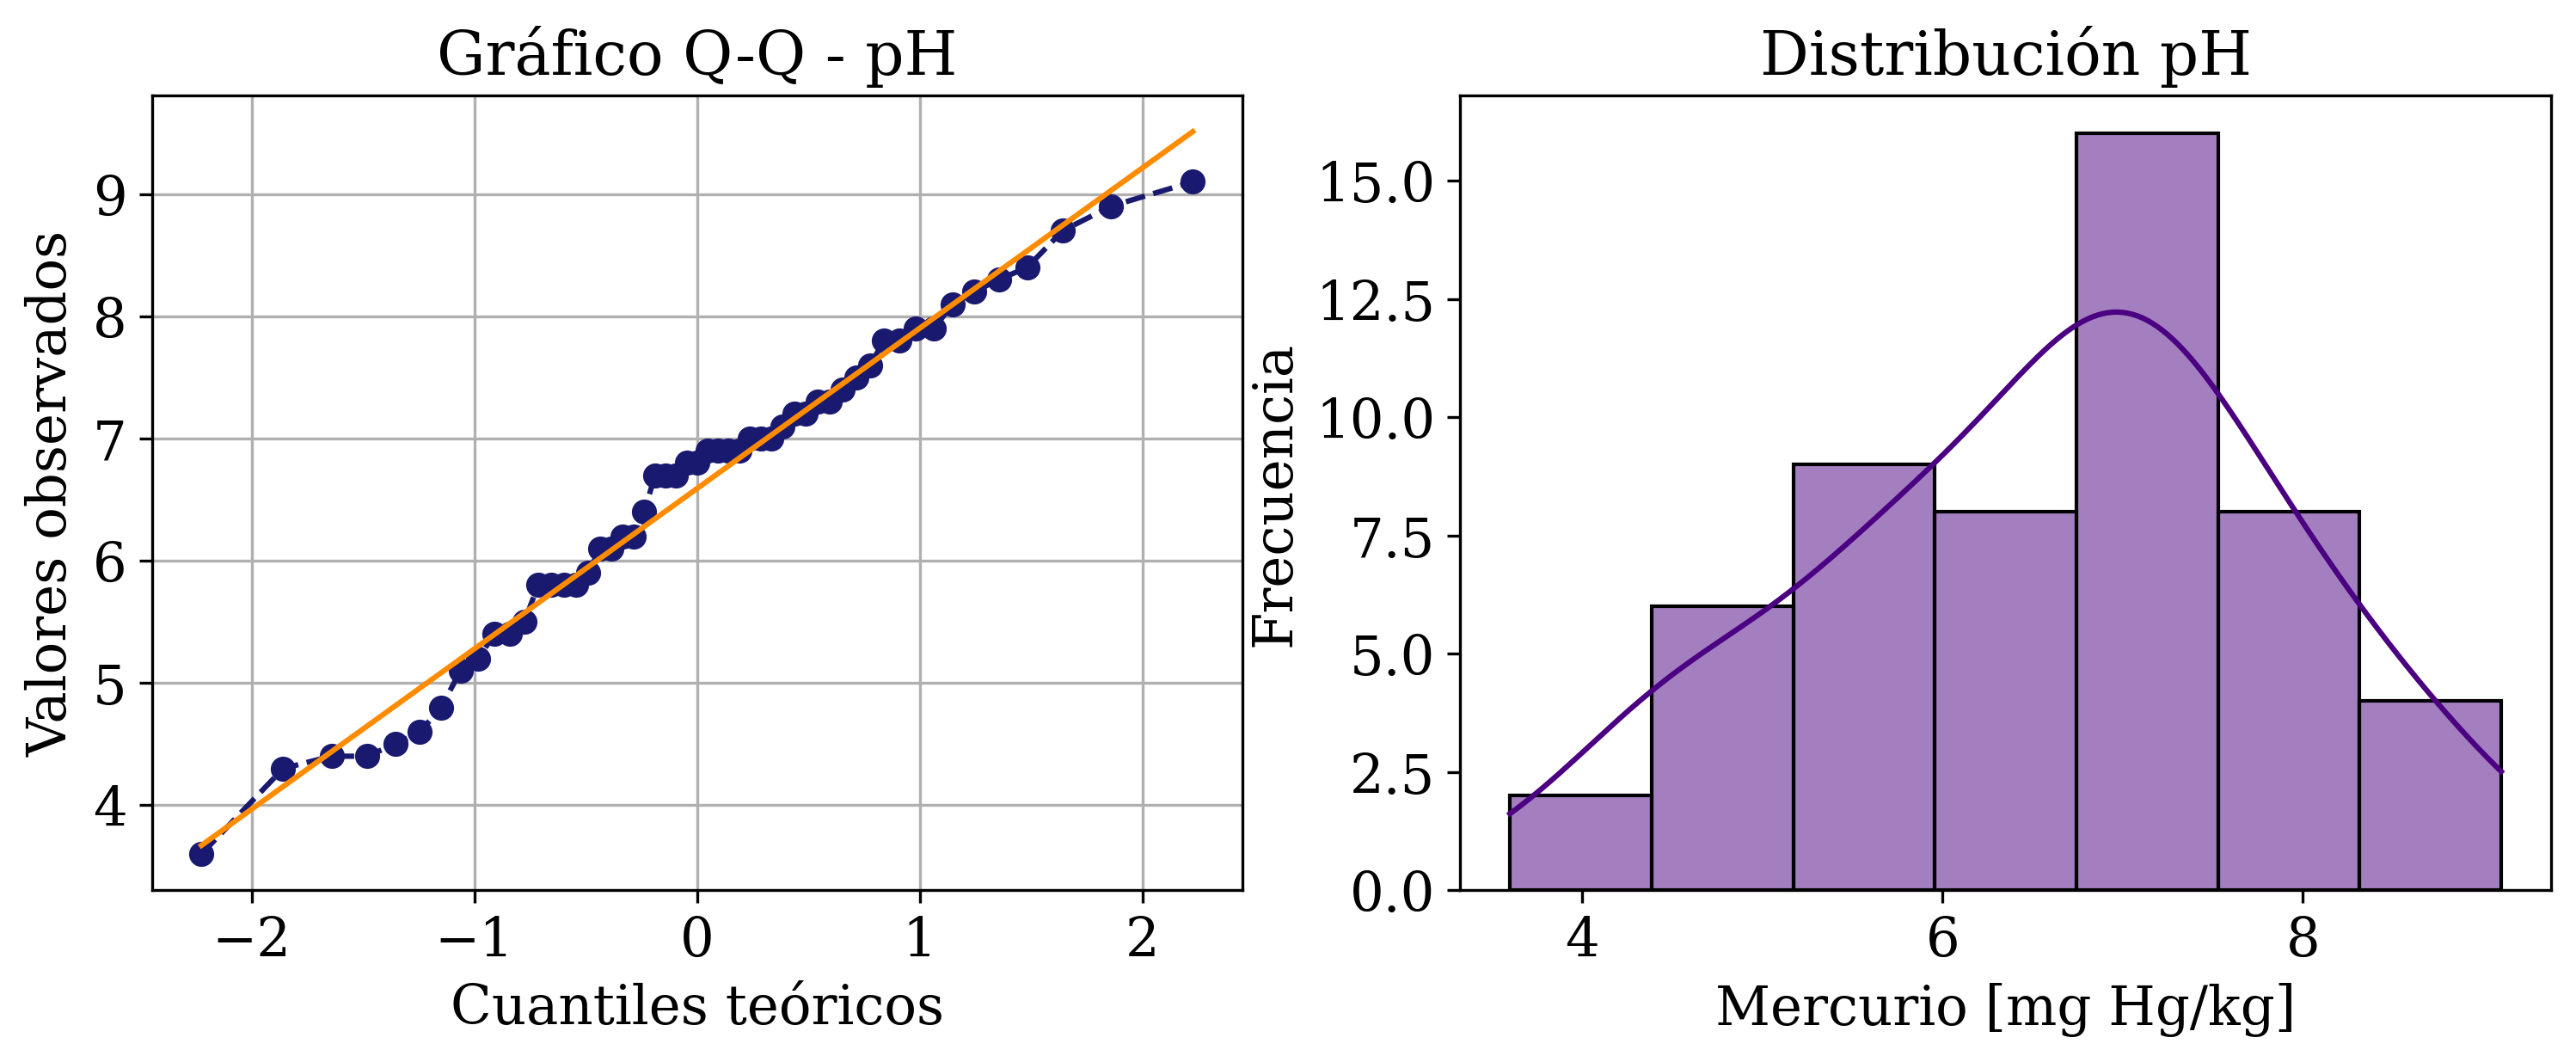

In [11]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 15
# plt.rcParams["text.usetex"] = True
plt.rcParams["axes.titlesize"] = 17

# plt.rcParams.update({"figure.dpi": 180, "font.family": "serif", "text.usetex": True, "font.size": 14, "axes.titlesize": 16,})

fig, axes = plt.subplots(1,2, figsize=(12,4))

probplot(df.pH, plot = axes[0])
axes[0].get_lines()[0].set_marker('o')
axes[0].get_lines()[0].set_linestyle('--')
axes[0].get_lines()[0].set_color('midnightblue')
axes[0].get_lines()[1].set_color('darkorange')
axes[0].set_title("Gráfico Q-Q - pH")
axes[0].set_xlabel("Cuantiles teóricos")
axes[0].set_ylabel("Valores observados")
axes[0].grid()

sns.histplot(data = df, x = "pH", kde = True, color="indigo", ax = axes[1])
axes[1].set_title("Distribución pH")
axes[1].set_xlabel("Mercurio [mg Hg/kg]")
axes[1].set_ylabel("Frecuencia")
plt.show()

In [12]:
df.MaxMercurio.skew()

0.4920966176197896

In [13]:
df.MaxMercurio.kurtosis()

-0.5149449394161021

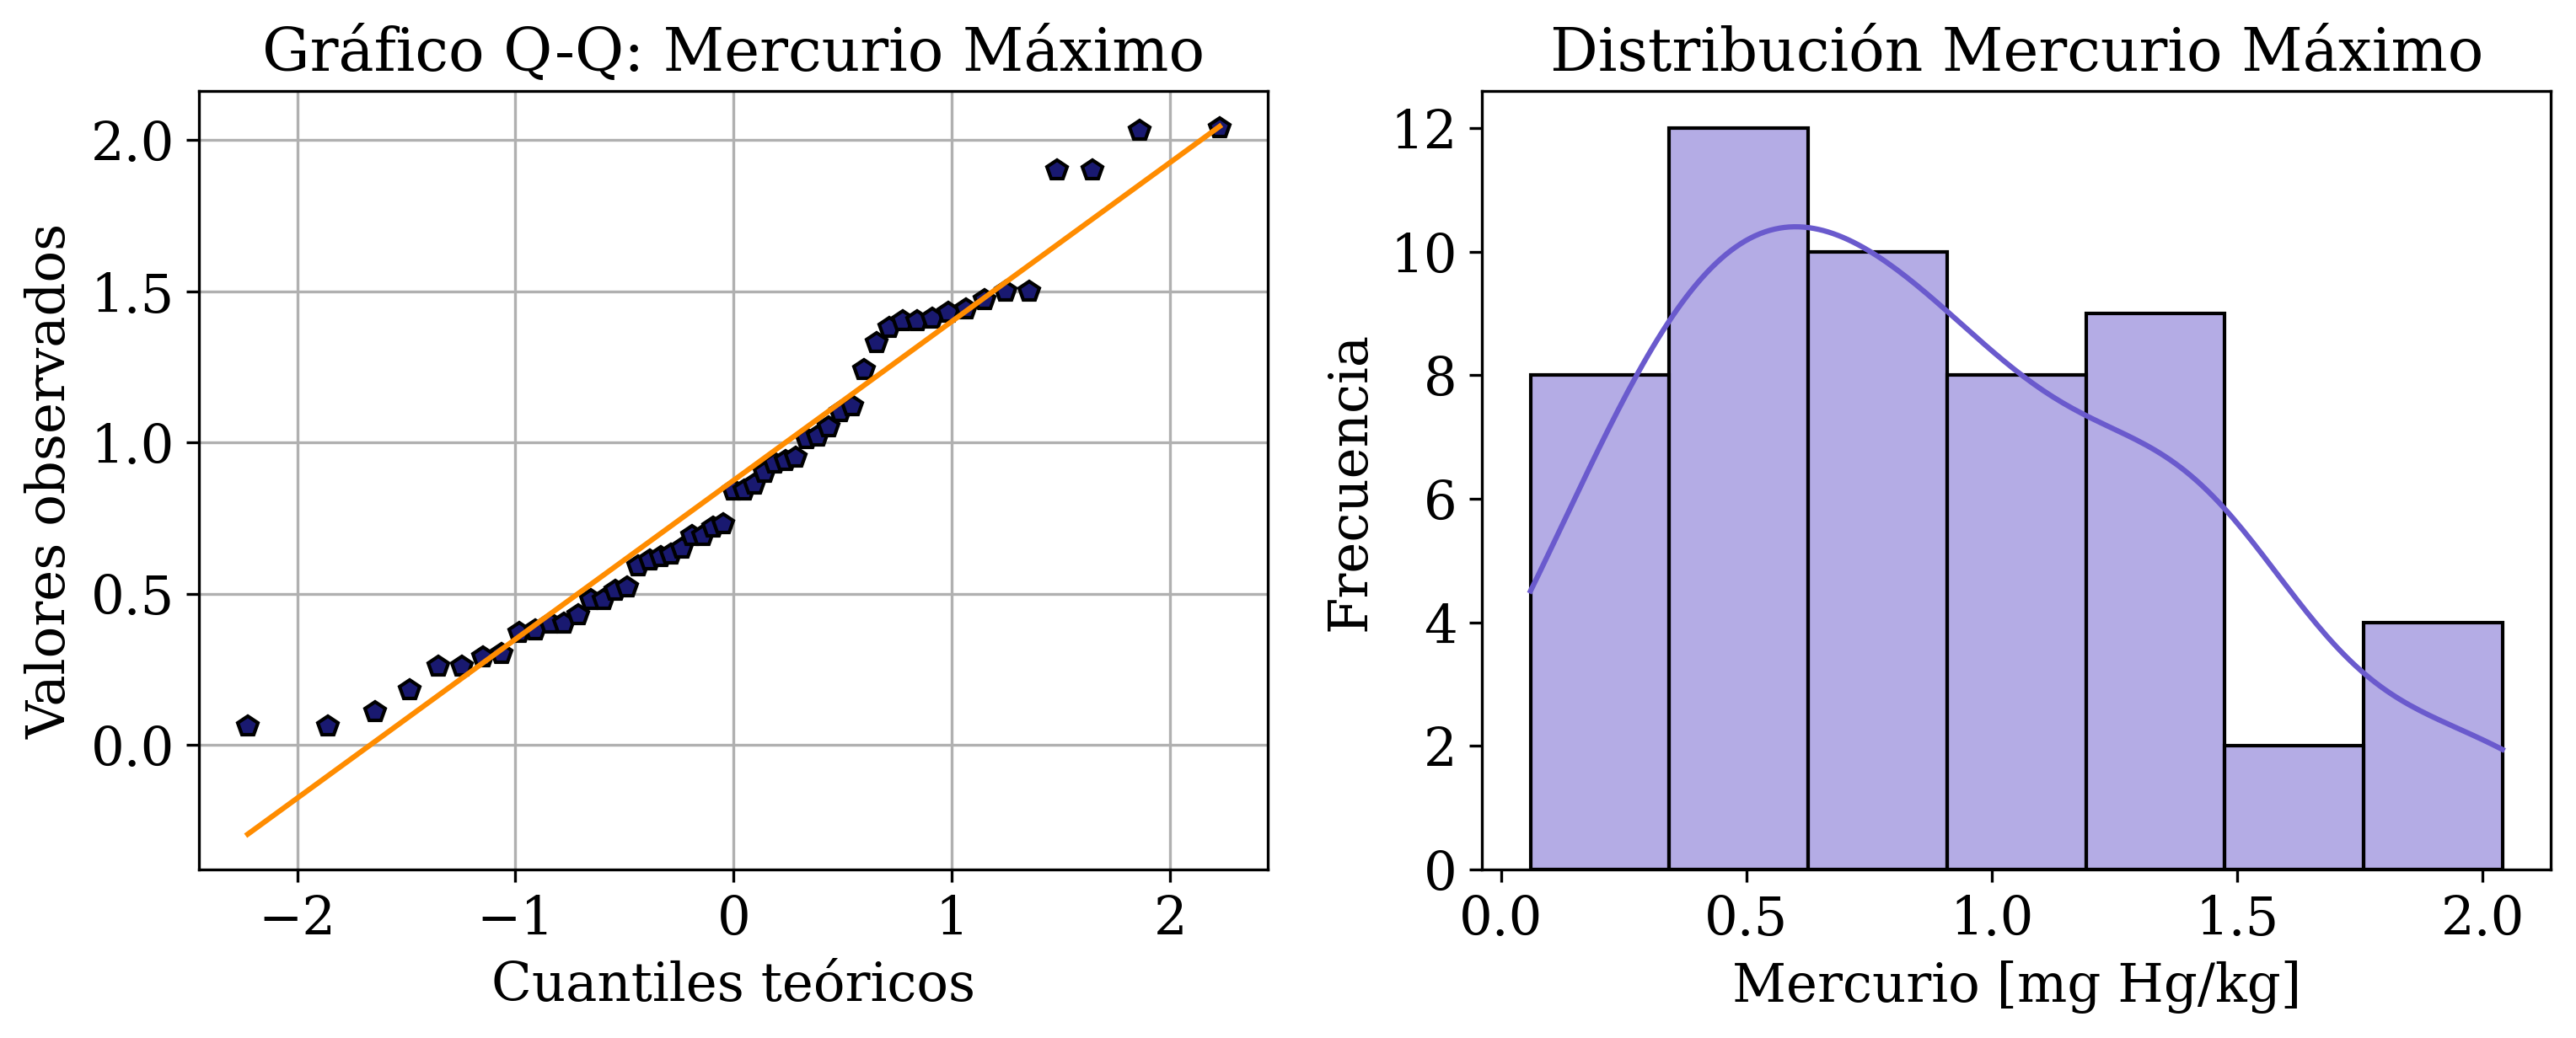

In [14]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
probplot(df.MaxMercurio, plot = axes[0])
axes[0].get_lines()[0].set_marker('p')
axes[0].get_lines()[0].set_markeredgecolor("k")
# axes[0].get_lines()[0].set_linestyle('-')
axes[0].get_lines()[0].set_color('midnightblue')
axes[0].get_lines()[1].set_color('darkorange')
axes[0].set_title("Gráfico Q-Q: Mercurio Máximo")
axes[0].set_xlabel("Cuantiles teóricos")
axes[0].set_ylabel("Valores observados")
axes[0].grid()

sns.histplot(data = df, x = "MaxMercurio", kde = True, color="slateblue", ax = axes[1])
axes[1].set_title("Distribución Mercurio Máximo")
axes[1].set_xlabel("Mercurio [mg Hg/kg]")
axes[1].set_ylabel("Frecuencia")
plt.show()

In [15]:
multivariate_normality(df[["pH", "MaxMercurio"]], alpha=0.05)

HZResults(hz=0.7695729297184755, pval=0.10247634232414388, normal=True)

Prueba de normalidad multivariada de todas las combinaciones

In [16]:
numericVars

['Alcalinidad',
 'pH',
 'Calcio',
 'Clorofila',
 'Mercurio',
 'N_Peces',
 'MinMercurio',
 'MaxMercurio',
 'Estimacion',
 'Edad']

In [17]:
from itertools import combinations

nn = len(numericVars)
c = 0

for i in range(2, nn):
  comb = combinations(numericVars, i)
  for j in comb:
    cols = list(j)
    # print(cols)
    data = df[cols]
    lol = multivariate_normality(data, alpha=0.05)
    if lol.normal:
      c += 1
      print(list(data.columns))

print("Hay", c, "normal(es) multivariada(s)")

['pH', 'MaxMercurio']
Hay 1 normal(es) multivariada(s)


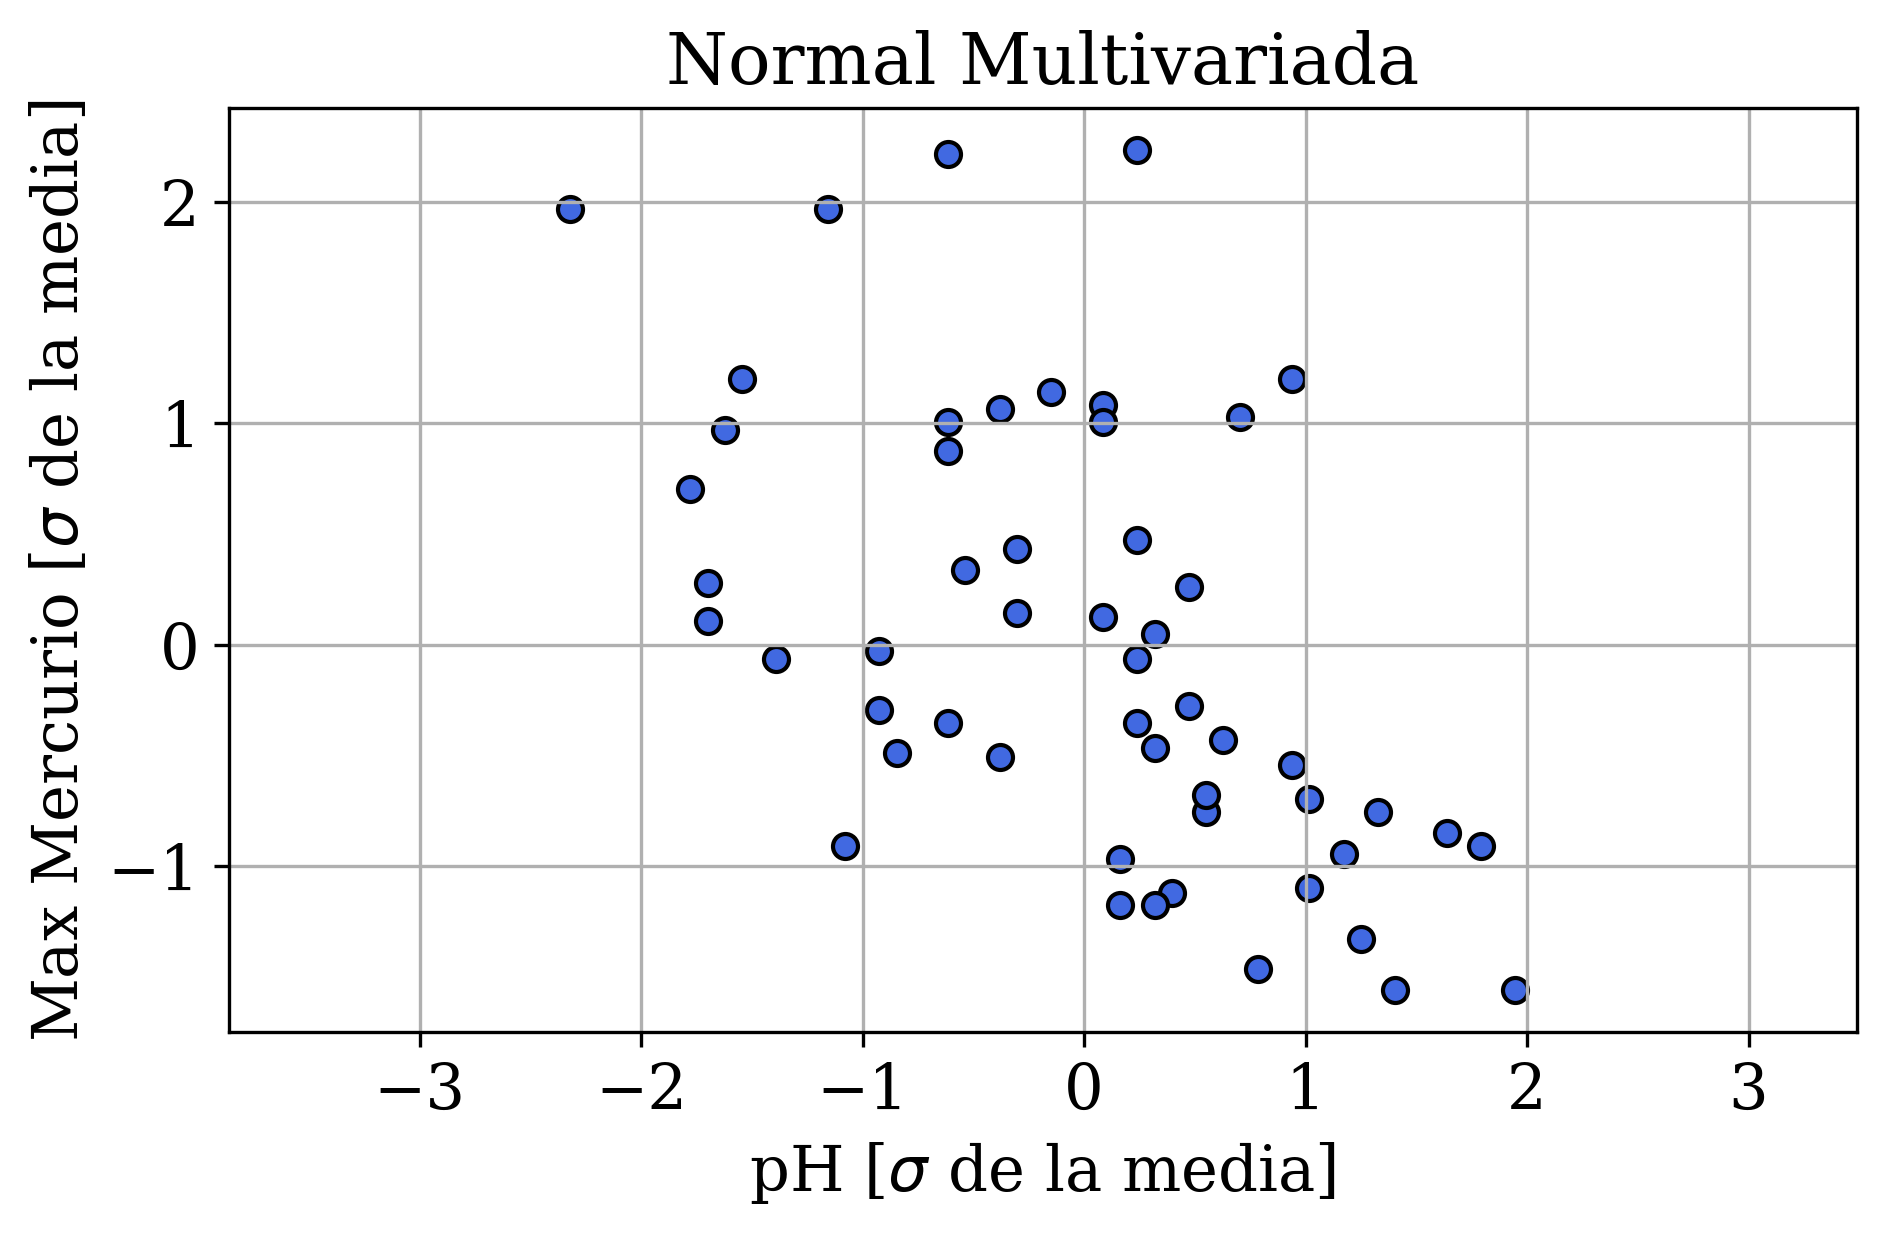

In [18]:
X1 = (df.pH - df.pH.mean())/df.pH.std()
X2 = (df.MaxMercurio - df.MaxMercurio.mean())/df.MaxMercurio.std()

plt.scatter(X1, X2, color = "royalblue", edgecolor="k")

fig = plt.gcf()
fig.set_size_inches(7, 4)

plt.title("Normal Multivariada")
plt.ylabel(r"Max Mercurio [$\sigma$ de la media]")
plt.xlabel(r"pH [$\sigma$ de la media]")
plt.grid()
plt.axis("equal")
plt.show()

In [19]:
S = np.cov(X1, X2)
S

array([[ 1.        , -0.55181523],
       [-0.55181523,  1.        ]])

In [20]:
rho = -S[0,1]/(np.sqrt(S[0,0])*np.sqrt(S[1,1]))
rho

0.5518152316870063

In [21]:
lol = np.ones(len(df))*(-0.05)

In [22]:
x = np.linspace(-3,3, 200)
y = np.linspace(-3,3, 200)


rv = np.random.multivariate_normal([X1.mean(), X2.mean()], S, size = 250)

X, Y = np.meshgrid(x,y)
f = (1/(2*np.pi*np.sqrt(1-rho**2)))*np.exp( -( 1/(2*(1-rho**2)) ) * (X**2 + Y**2) - 2*rho*X*Y )

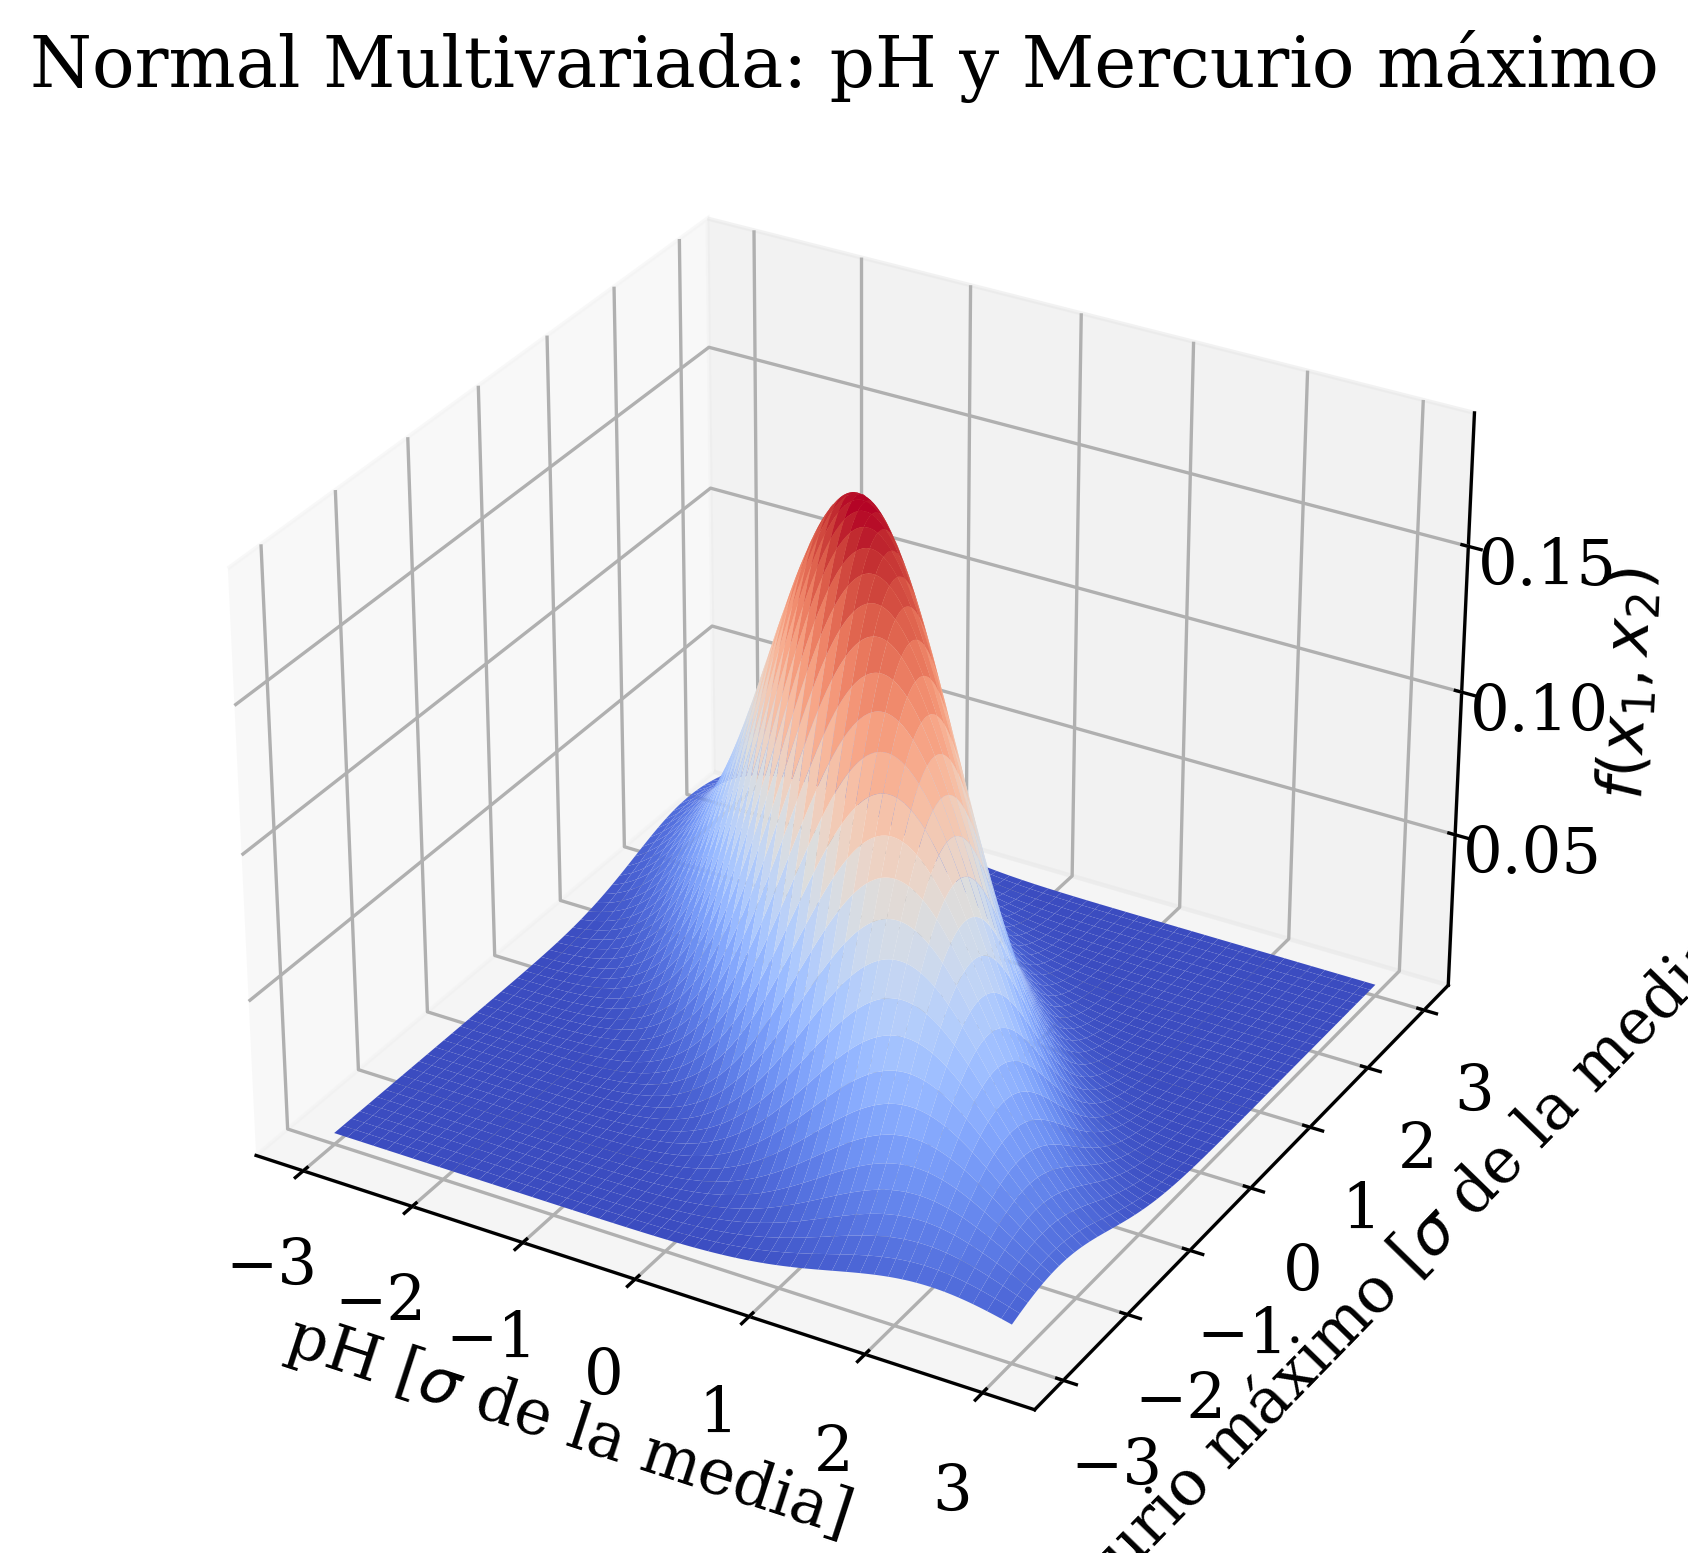

In [23]:
# from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(projection="3d")
ax.plot_surface(X, Y, f, cmap="coolwarm")

# ax.scatter(X1, X2, zs=-0.2, color="k")

ax.set_title("Normal Multivariada: pH y Mercurio máximo")
ax.set_xlabel(r"pH [$\sigma$ de la media]")
ax.set_ylabel(r"Mercurio máximo [$\sigma$ de la media]")
ax.set_zlabel(r"$f(x_1, x_2)$")
plt.show()

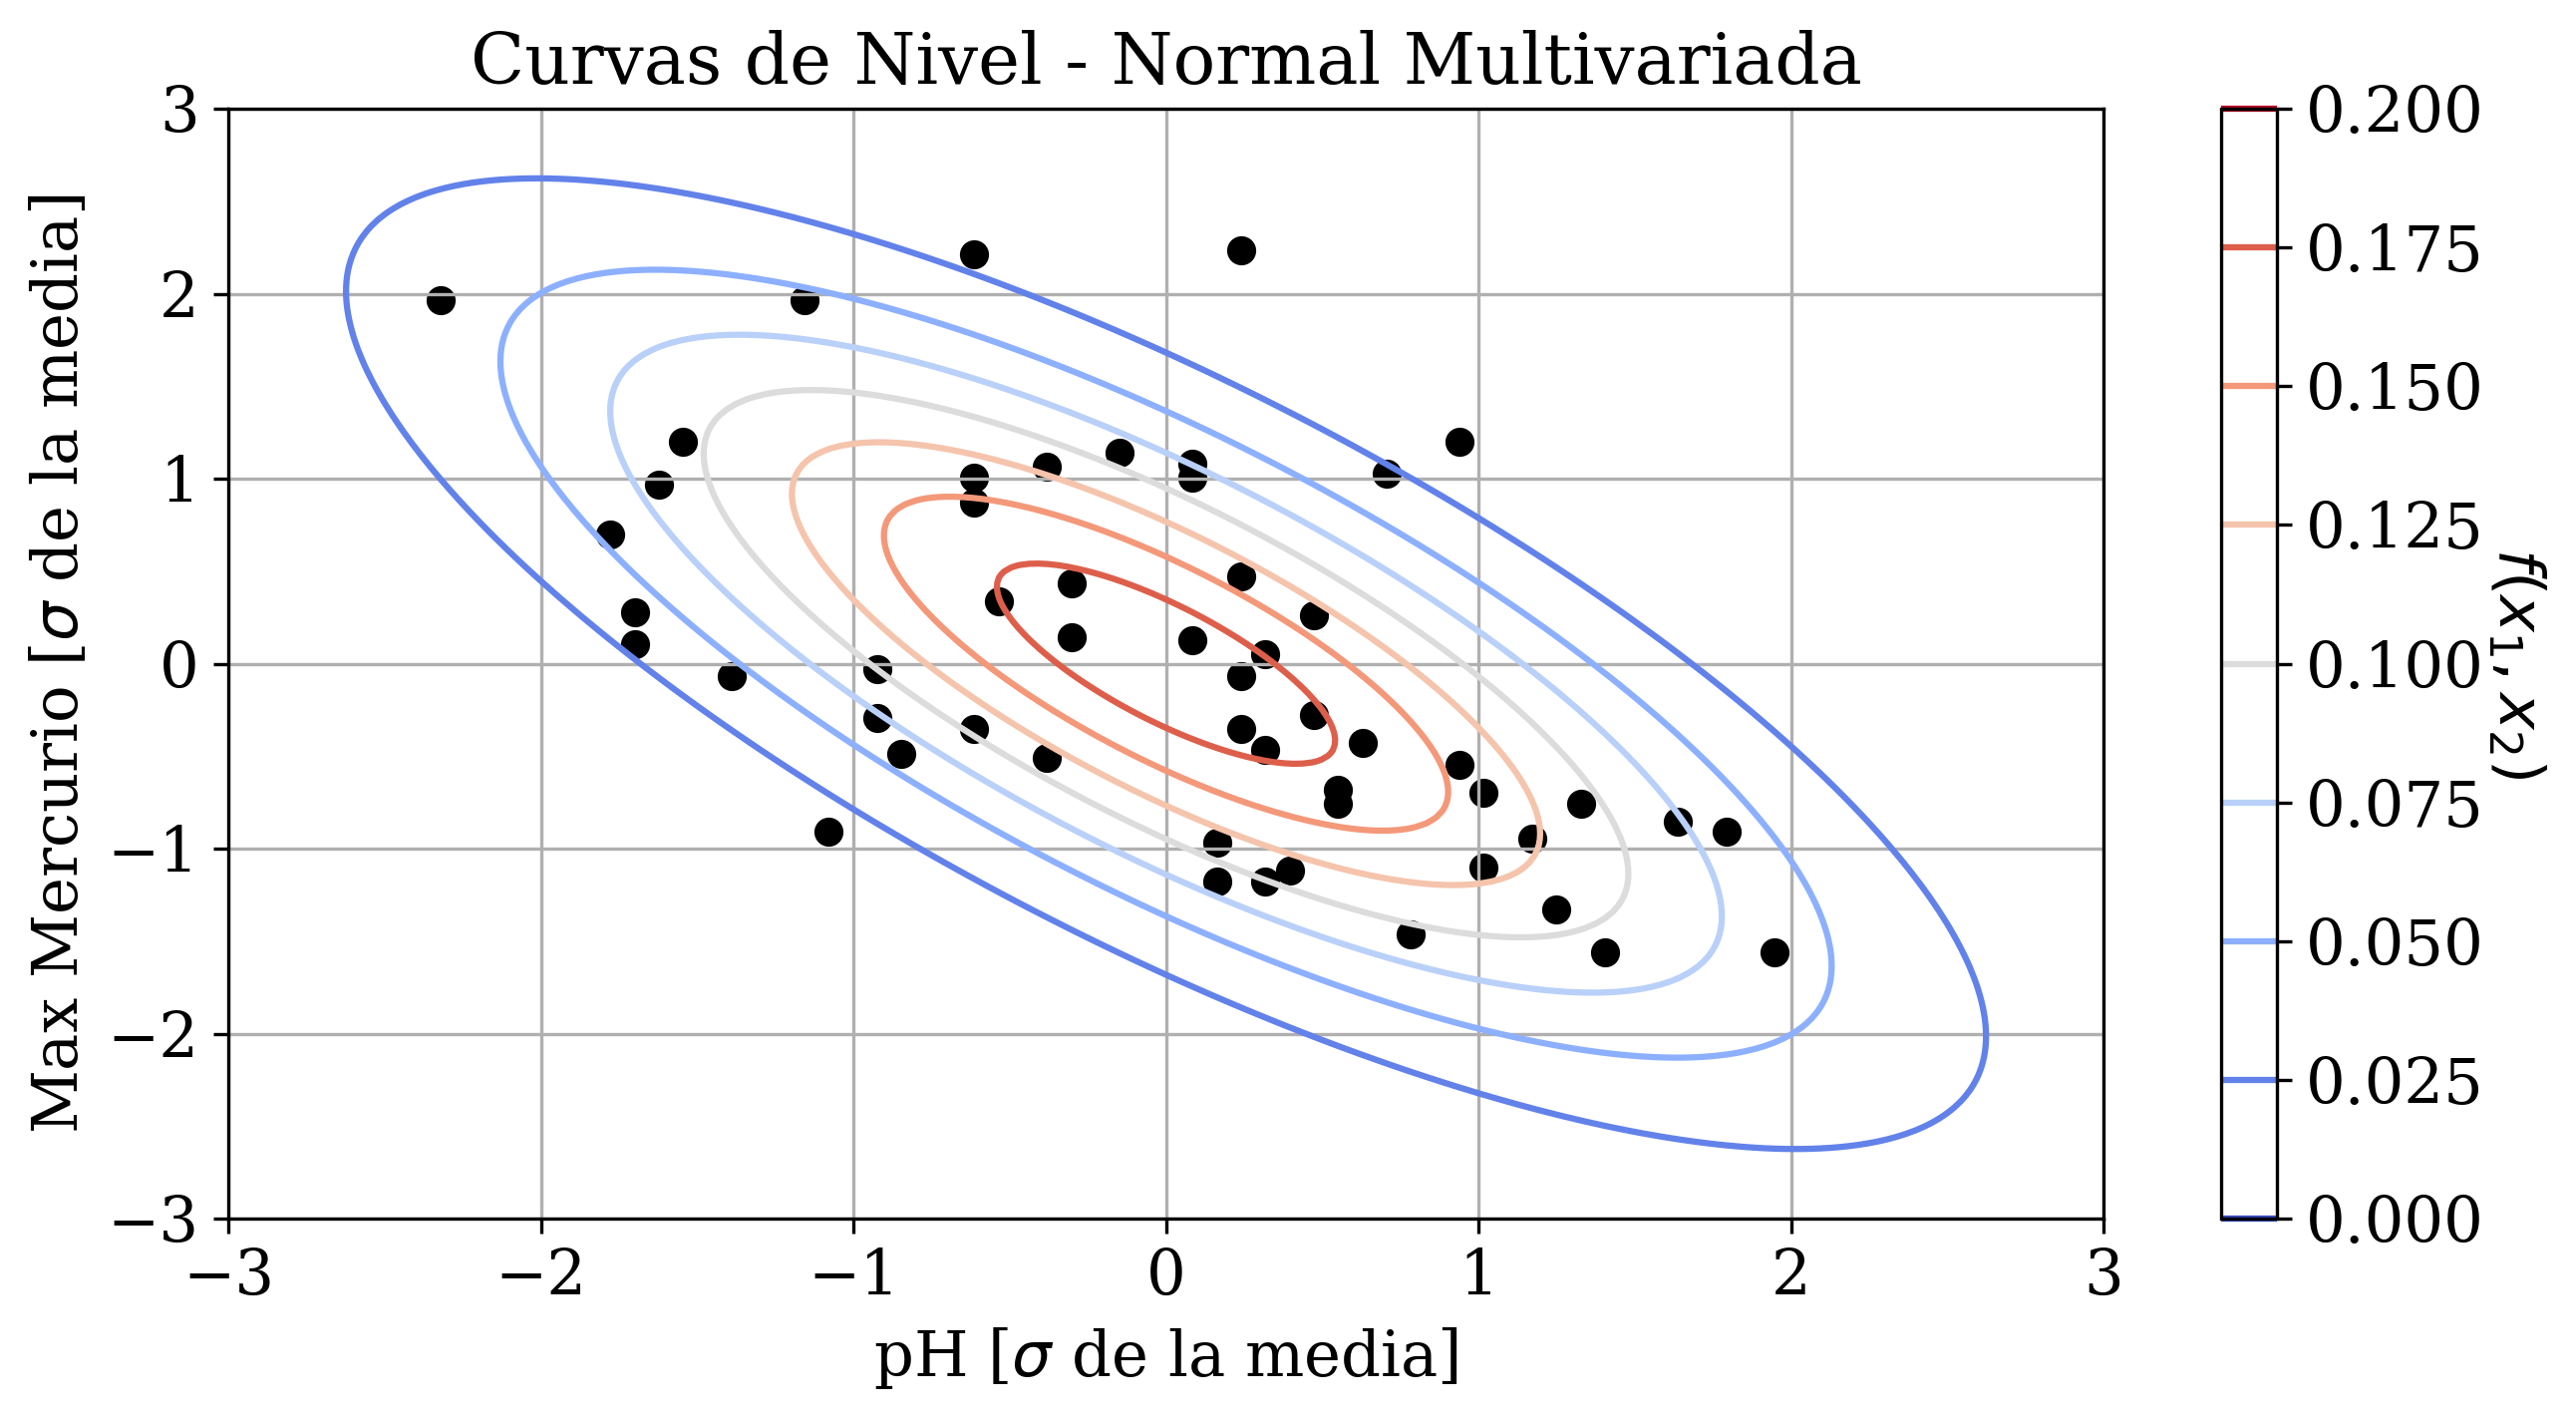

In [24]:
plt.contour(X, Y, f, 8, cmap='coolwarm', linestyles="solid")

fig = plt.gcf()
fig.set_size_inches(9, 5)

ax.set_figure
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel(r"$f(x_1, x_2)$", rotation=270)

plt.scatter(X1, X2, color = "k")

plt.title("Curvas de Nivel - Normal Multivariada")
ax.set_xlabel(r"pH [$\sigma$ de la media]")
ax.set_ylabel(r"Mercurio máximo [$\sigma$ de la media]")
plt.ylabel(r"Max Mercurio [$\sigma$ de la media]")
plt.xlabel(r"pH [$\sigma$ de la media]")
plt.grid()
plt.tight_layout()

plt.show()

In [25]:
Md = pd.DataFrame(np.array([X1, X2]).T)
lam, v = np.linalg.eig(S)

In [26]:
# Chi_2^2 (alpha 0.05) = 5.99 - 95% confidence

def get_confidence_interval(alpha):
  gl = 2
  significance = 1 - alpha
  ci = chi2.ppf(significance, gl)
  print(ci)
  theta = np.linspace(0, 2*np.pi, len(X1));
  ab = np.sqrt(ci*lam[None,:])
  return (ab * v) @ np.array([np.sin(theta), np.cos(theta)])

ellipsis68 = get_confidence_interval(0.32)
ellipsis95 = get_confidence_interval(0.05)

2.278868566376729
5.991464547107979


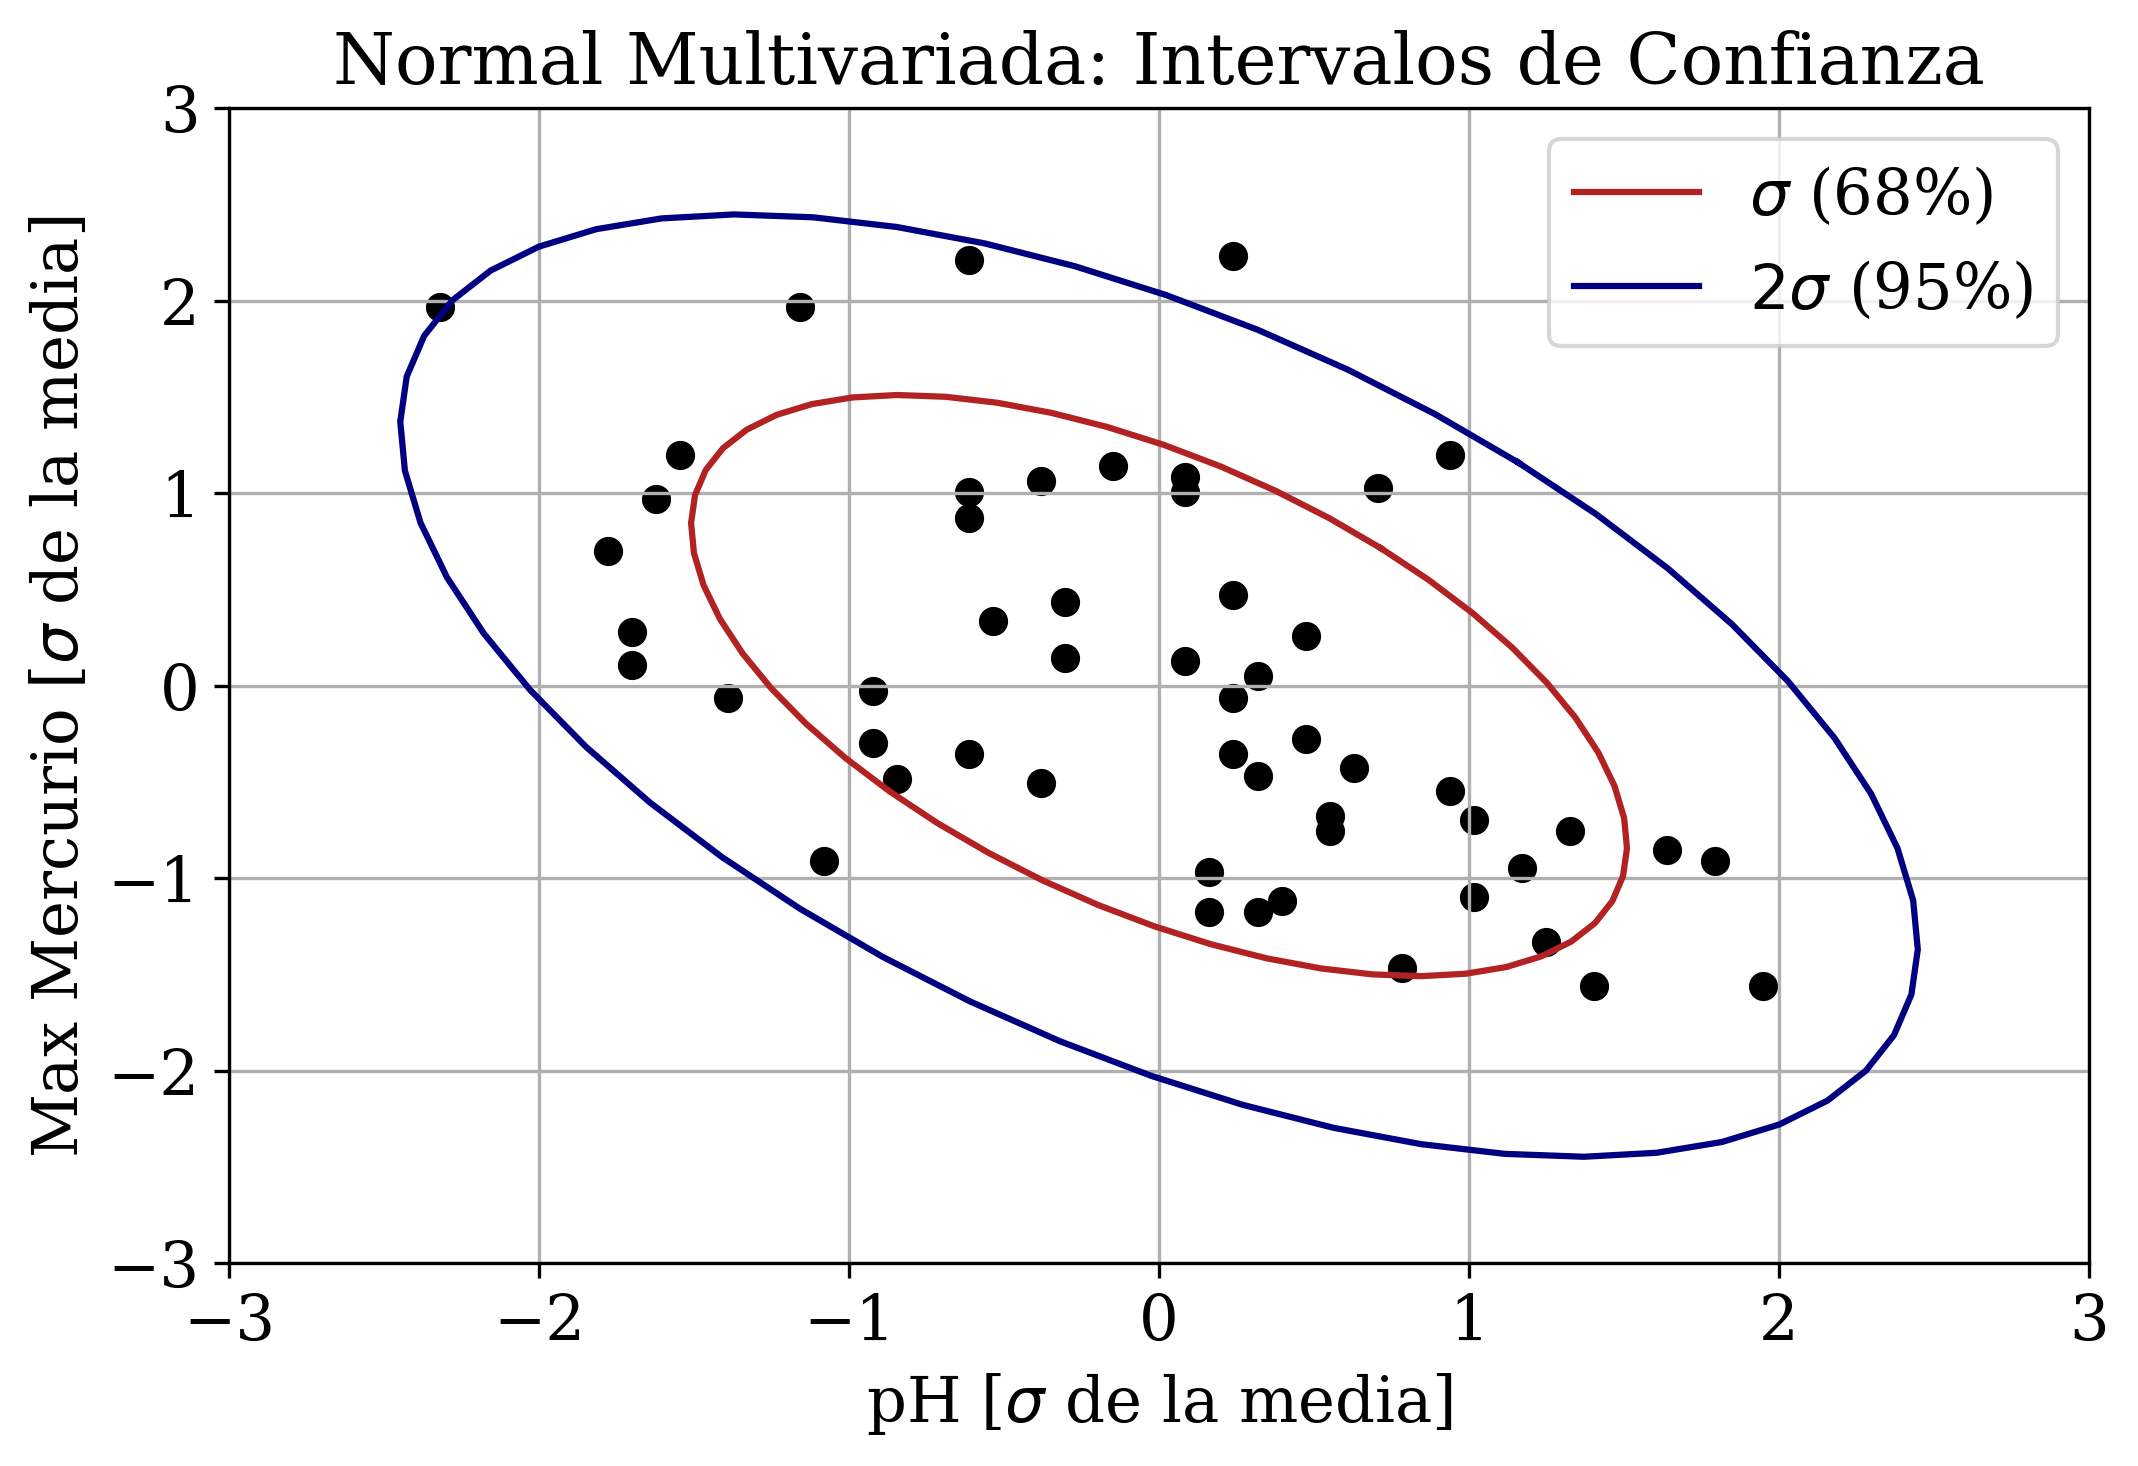

In [27]:
# plt.scatter(Md[0], Md[1], color = "blue")
plt.scatter(X1, X2, color = "k", edgecolor="k")

fig = plt.gcf()
fig.set_size_inches(8, 5)

plt.plot(ellipsis68[0,:], ellipsis68[1,:], color = "firebrick", label=r"$\sigma$ (68%)")
plt.plot(ellipsis95[0,:], ellipsis95[1,:], color = "navy", label=r"$2\sigma$ (95%)")

plt.title("Normal Multivariada: Intervalos de Confianza")
plt.xlabel(r"pH [$\sigma$ de la media]")
plt.ylabel(r"Max Mercurio [$\sigma$ de la media]")
plt.xlim([-3, 3])
plt.ylim([-3,3])
plt.legend()
plt.grid()
plt.show()

# Análisis de Componentes Principales

In [28]:
cols = df.corr(numeric_only=True).columns
dfs = df[cols]

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [30]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
dfs = scaler.fit_transform(dfs)
dfs = pd.DataFrame(dfs, columns = cols)

In [31]:
dfs.head()

Alcalinidad        pH    Calcio  Clorofila  Mercurio   N_Peces  \
0    -0.835862 -0.384385 -0.777523  -0.734400  2.080592 -0.950124   
1    -0.899285 -1.167939 -0.822064  -0.652498  2.376623 -0.714262   
2     2.073650  1.966277  0.886698   3.445888 -1.442171 -0.832193   
3     0.049412  0.242458 -0.234930  -0.642669 -0.258049 -0.124606   
4    -0.925711 -1.559716 -0.781572  -0.698363  1.991783 -0.124606   

   MinMercurio  MaxMercurio  Estimacion      Edad  
0     2.542537     1.074209    3.030510  0.482243  
1     2.854675     1.983127    2.434418 -2.073644  
2    -1.069346    -1.575190   -1.410376 -2.073644  
3    -0.668026    -0.066773   -0.218192 -2.073644  
4     1.829079     1.209580    2.434418  0.482243

In [32]:
R = dfs.corr()
lam, v = np.linalg.eig(R)

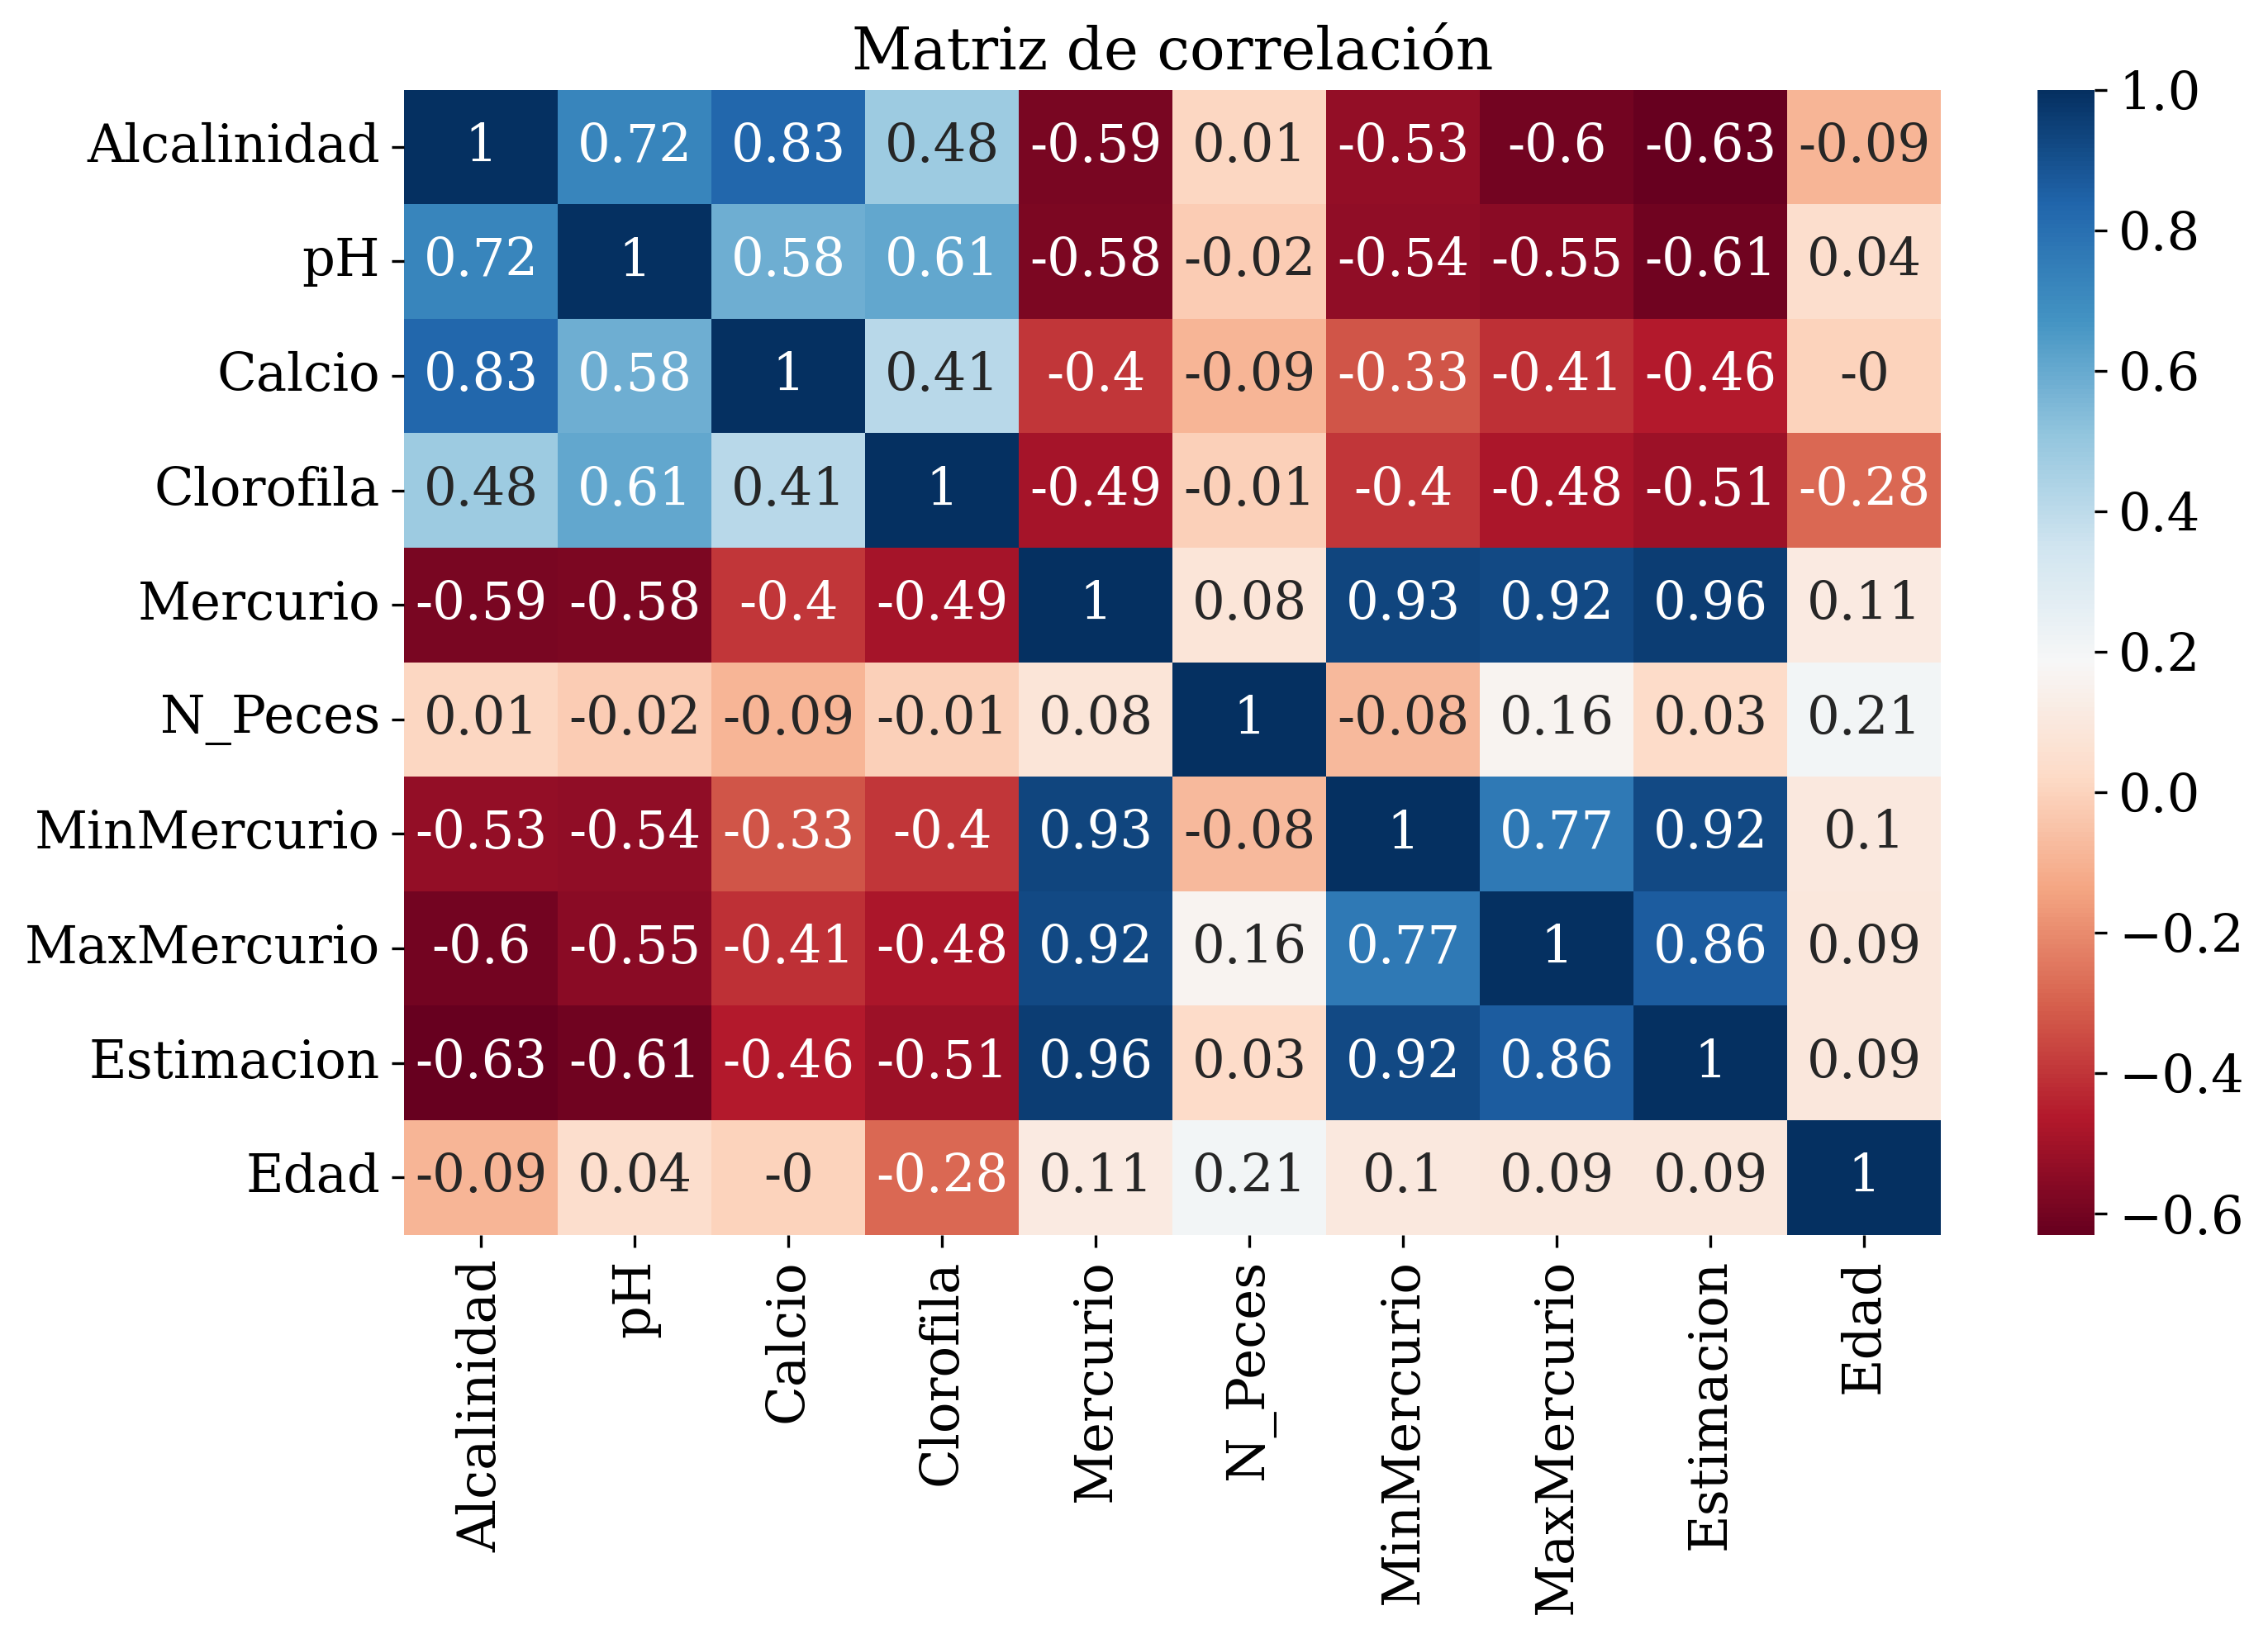

In [33]:
# PCA on similar correlation variables and compare them???
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(R.round(decimals=2), cmap="RdBu", annot=True, ax = ax)
plt.title("Matriz de correlación")
plt.show()

Eigenvalores

In [34]:
pd.DataFrame(lam).head()

0
0  5.361226
1  1.254261
2  1.216681
3  0.909433
4  0.591417

Eigenvectores

In [35]:
pd.DataFrame(v).head()

0         1         2         3         4         5         6  \
0 -0.350659 -0.216916 -0.347291 -0.009131  0.340505  0.075475  0.338235   
1 -0.337004 -0.219409 -0.236097  0.017242 -0.393960  0.731210  0.086296   
2 -0.281683 -0.262507 -0.511378 -0.146950  0.362059 -0.313423 -0.343122   
3 -0.283342  0.101951 -0.263961  0.432676 -0.630934 -0.441122 -0.134352   
4  0.398308 -0.121042 -0.299664  0.080630 -0.030469  0.074369  0.013778   

          7         8         9  
0 -0.686230 -0.022398  0.042840  
1  0.287692  0.044453  0.013636  
2  0.455688  0.026347 -0.115083  
3 -0.190070 -0.039824 -0.063331  
4  0.016748 -0.848276  0.062433

Varianza explicada

In [36]:
var_expl = (lam/lam.sum())*100
pd.DataFrame(var_expl).round(decimals=4).head()

0
0  53.6123
1  12.5426
2  12.1668
3   9.0943
4   5.9142

In [37]:
np.cumsum(var_expl)

array([ 53.61226408,  66.15487501,  78.32168878,  87.41601552,
        93.33018911,  96.36166322,  98.42902665,  99.29723991,
        99.48360976, 100.        ])

In [38]:
df.head()

Lago  Alcalinidad   pH  Calcio  Clorofila  Mercurio  N_Peces  \
0     Alligator          5.9  6.1     3.0        0.7      1.23        5   
1         Annie          3.5  5.1     1.9        3.2      1.33        7   
2        Apopka        116.0  9.1    44.1      128.3      0.04        6   
3  Blue Cypress         39.4  6.9    16.4        3.5      0.44       12   
4         Brick          2.5  4.6     2.9        1.8      1.20       12   

   MinMercurio  MaxMercurio  Estimacion  Edad  
0         0.85         1.43        1.53     1  
1         0.92         1.90        1.33     0  
2         0.04         0.06        0.04     0  
3         0.13         0.84        0.44     0  
4         0.69         1.50        1.33     1

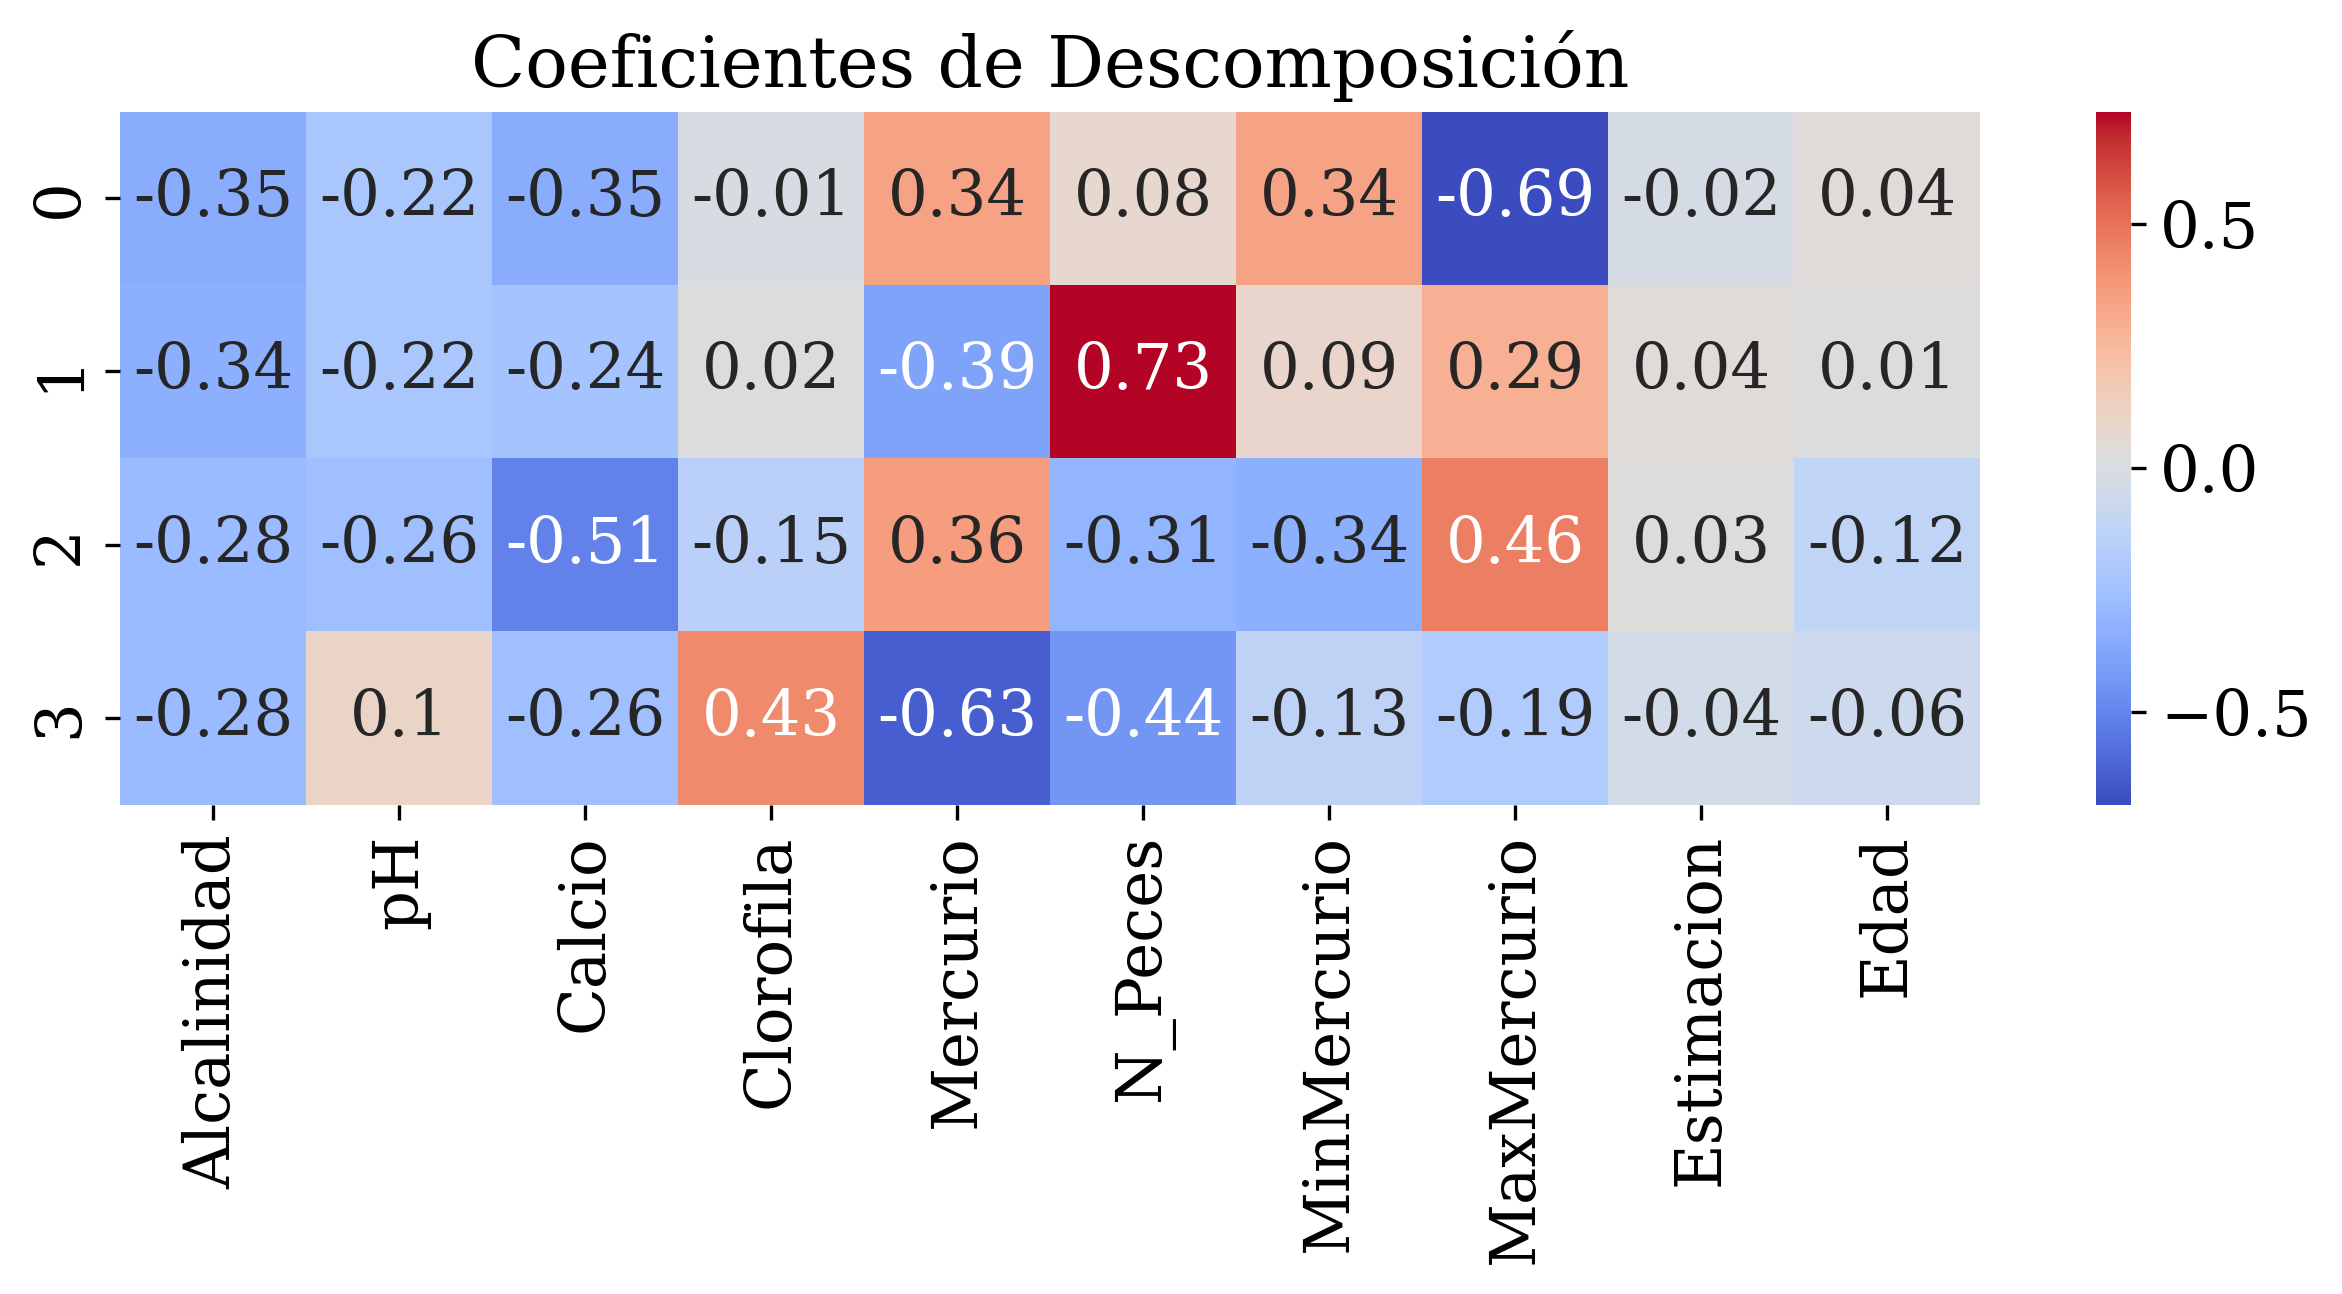

In [39]:
coeffs = pd.DataFrame(v, columns = cols).loc[0:4, :]
coeffs = coeffs.round(decimals=2)#.abs()
# coeffs = (coeffs > 0.69/2).astype(int)

if coeffs.min().min() > 0:
  colormap = "Purples"
else:
  colormap = "coolwarm"

# fig, ax = plt.subplots(figsize=(10,6))
fig, ax = plt.subplots(figsize=(10,3))
sns.heatmap(coeffs.loc[0:3, :], cmap=colormap, annot=True, ax = ax)
plt.title("Coeficientes de Descomposición")
# plt.title("Eigenvectores de S")
plt.show()

In [40]:
df.head()

Lago  Alcalinidad   pH  Calcio  Clorofila  Mercurio  N_Peces  \
0     Alligator          5.9  6.1     3.0        0.7      1.23        5   
1         Annie          3.5  5.1     1.9        3.2      1.33        7   
2        Apopka        116.0  9.1    44.1      128.3      0.04        6   
3  Blue Cypress         39.4  6.9    16.4        3.5      0.44       12   
4         Brick          2.5  4.6     2.9        1.8      1.20       12   

   MinMercurio  MaxMercurio  Estimacion  Edad  
0         0.85         1.43        1.53     1  
1         0.92         1.90        1.33     0  
2         0.04         0.06        0.04     0  
3         0.13         0.84        0.44     0  
4         0.69         1.50        1.33     1

In [41]:
# n = 5 #len(df)
# pcs = 3
# pc_evol = np.zeros((pcs, n, len(dfs.columns)))
# for pc in range(pcs):
#   for datapoint in range(n):
#     PC = coeffs.loc[pc, :]
#     data = df[cols].loc[datapoint]
#     pc_evol[pc, datapoint,:] = np.cumsum(PC*data)

# plt.plot(pc_evol[0].T, color="r", marker="o", linestyle="--")
# plt.plot(pc_evol[1].T, color="b", marker="*", linestyle="-.")
# plt.plot(pc_evol[2].T, color="g", marker="p", linestyle="--")
# plt.show()

PCA1 - Variacion del nivel de alcalinidad, ph y calcio en funcion del nivel de mercurio y nivel minimo de mercurio en el lago regulado por el nivel maximo de mercurio

In [42]:
M = np.array(dfs[cols])

In [43]:
PCA = (v @ M.T)

pca_columns = ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10"]

PCA = pd.DataFrame(PCA.T, columns = pca_columns)
PCA.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  1.365559 -0.307733  1.534418 -1.505468 -2.734255  0.629991  2.632404   
1  1.076792  0.180404  2.387485 -1.840094 -2.270600  1.271905  1.296590   
2 -1.384938 -1.956949 -2.470802  2.777381  1.607941  0.805398 -1.852539   
3 -0.343811 -0.129749  0.514318  0.254899  0.052811 -0.870858 -1.323597   
4  1.364295  0.571494  1.864928 -1.797432 -2.061472  1.150706  1.991394   

       PCA8      PCA9     PCA10  
0 -1.486107  0.604568 -0.547665  
1 -2.483843  2.595180 -0.322780  
2  1.073979  1.821683 -1.675864  
3 -0.100963  1.515232  0.355154  
4 -0.874413  0.356363  0.104145

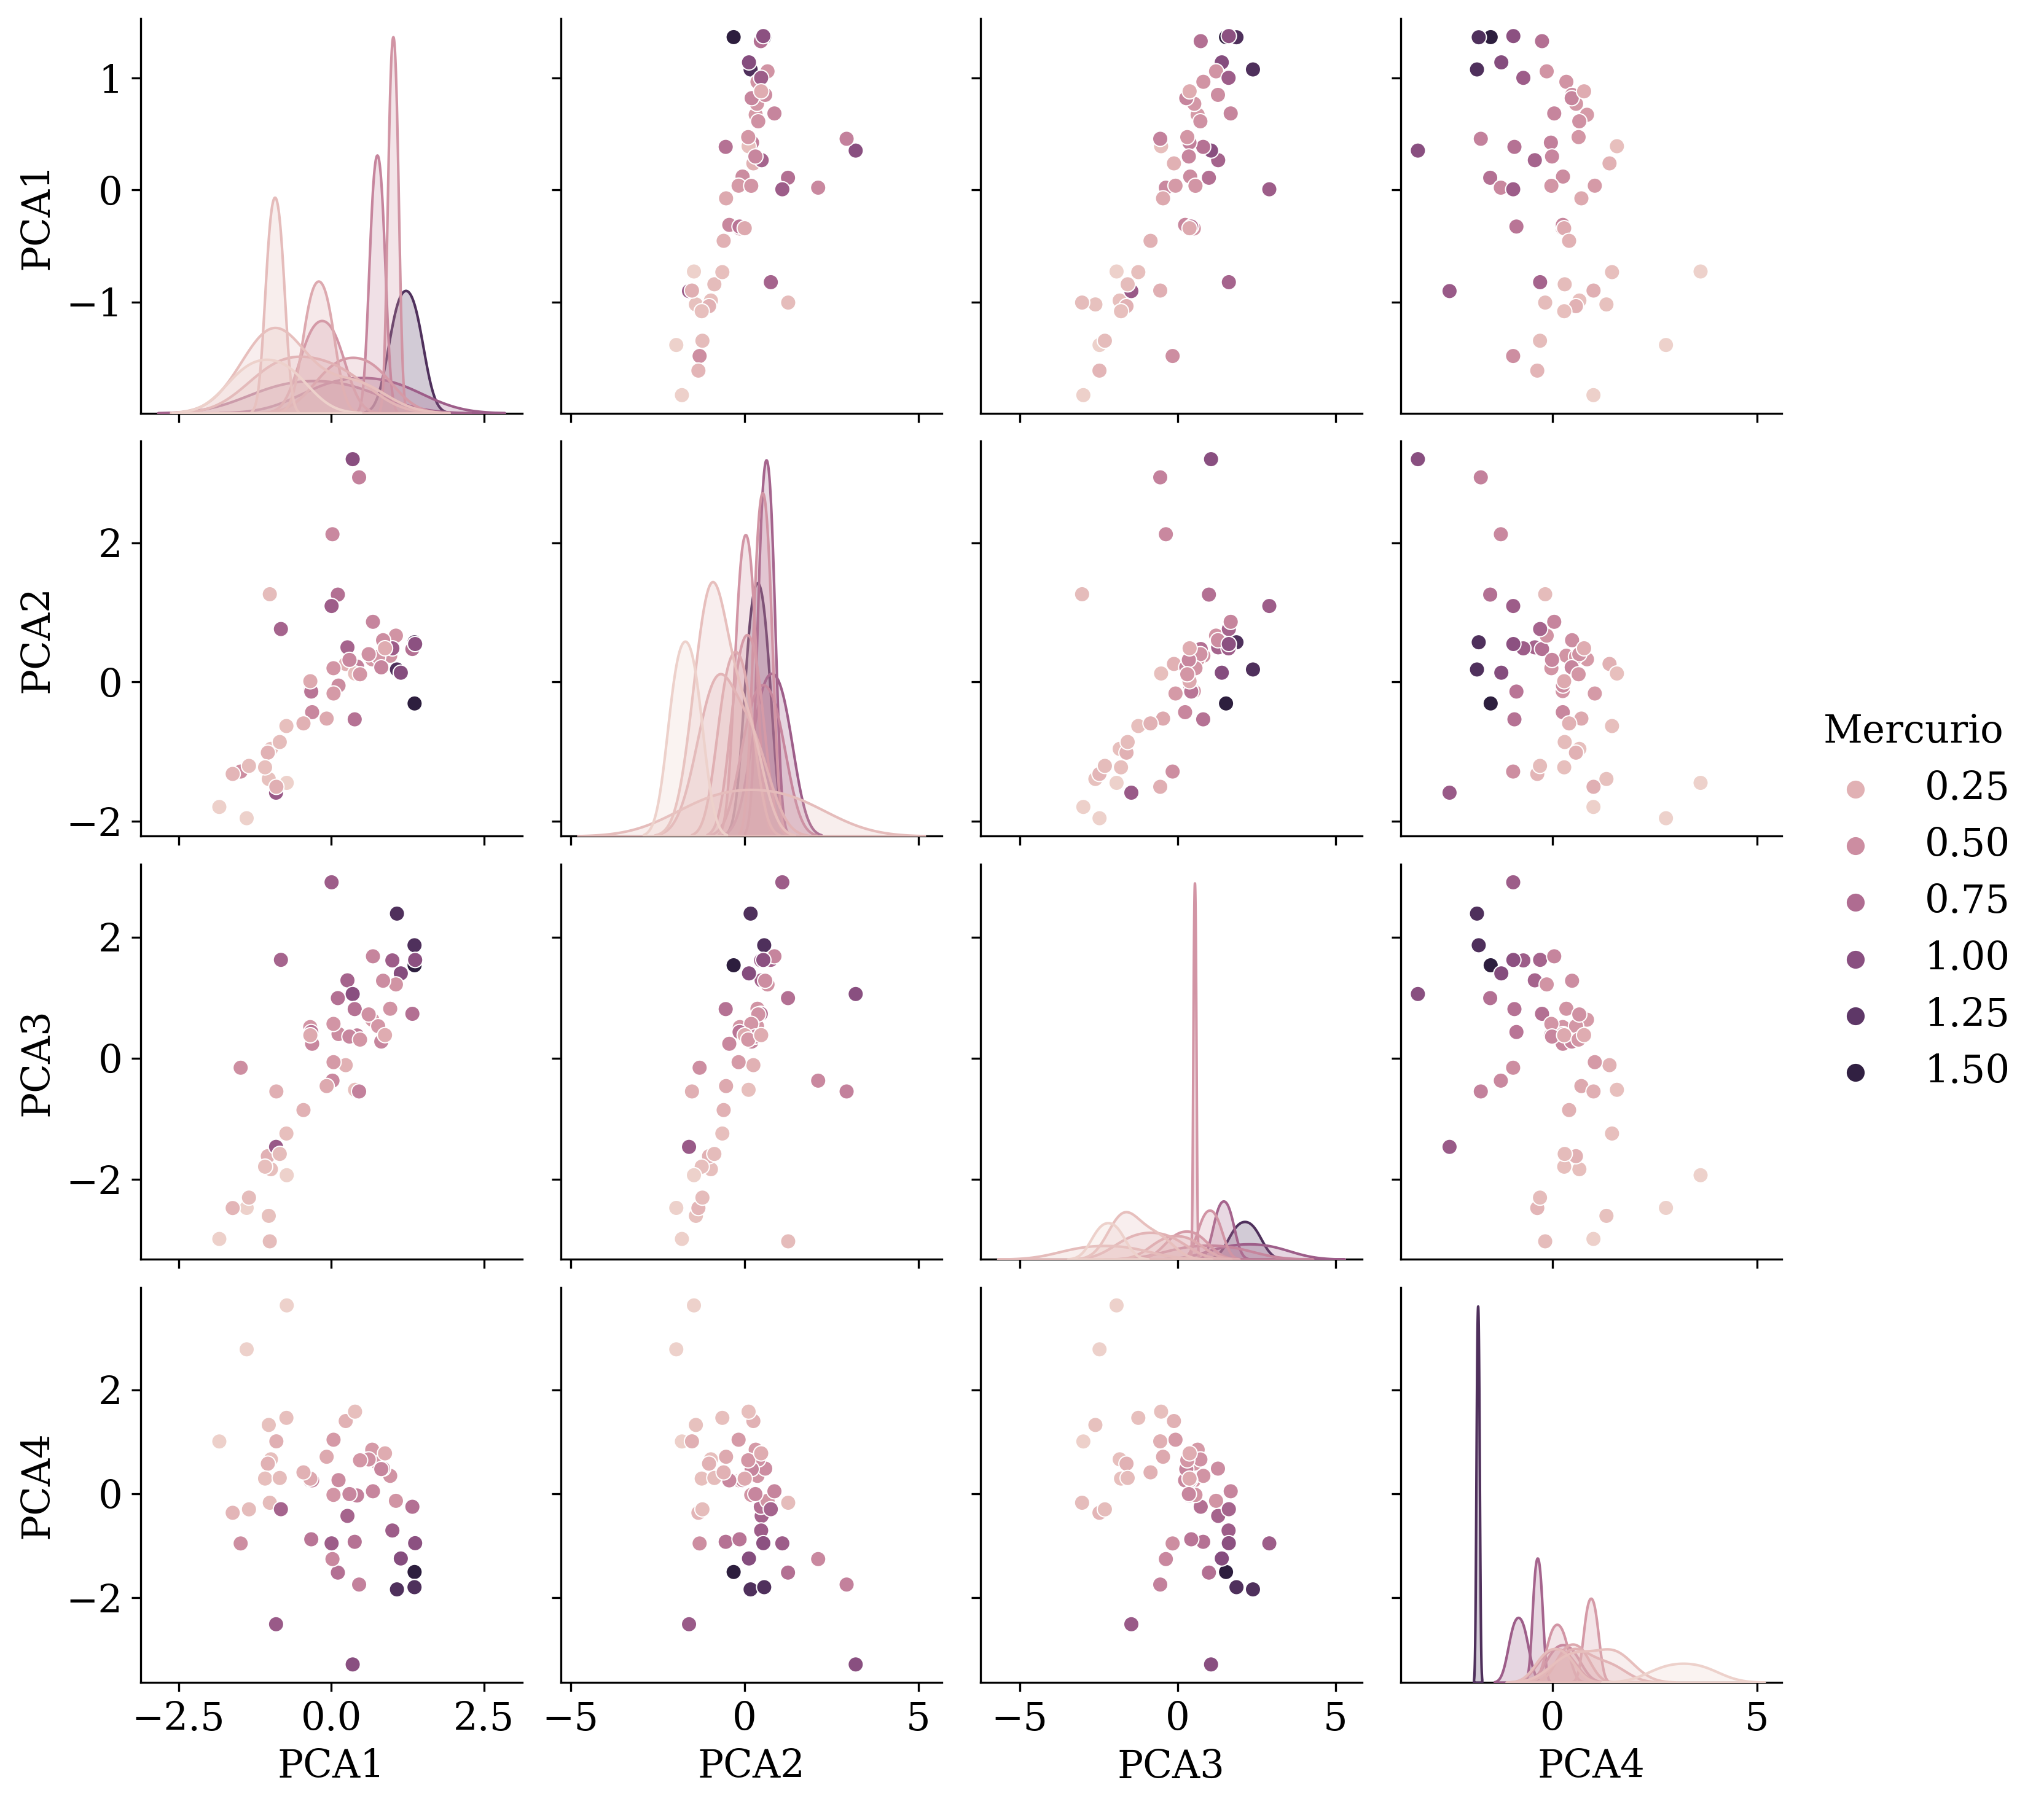

In [44]:
dummy = PCA.loc[:,PCA.columns[0:4]]
dummy["Mercurio"] = df.Estimacion

sns.pairplot(data=dummy, hue="Mercurio")
plt.show()

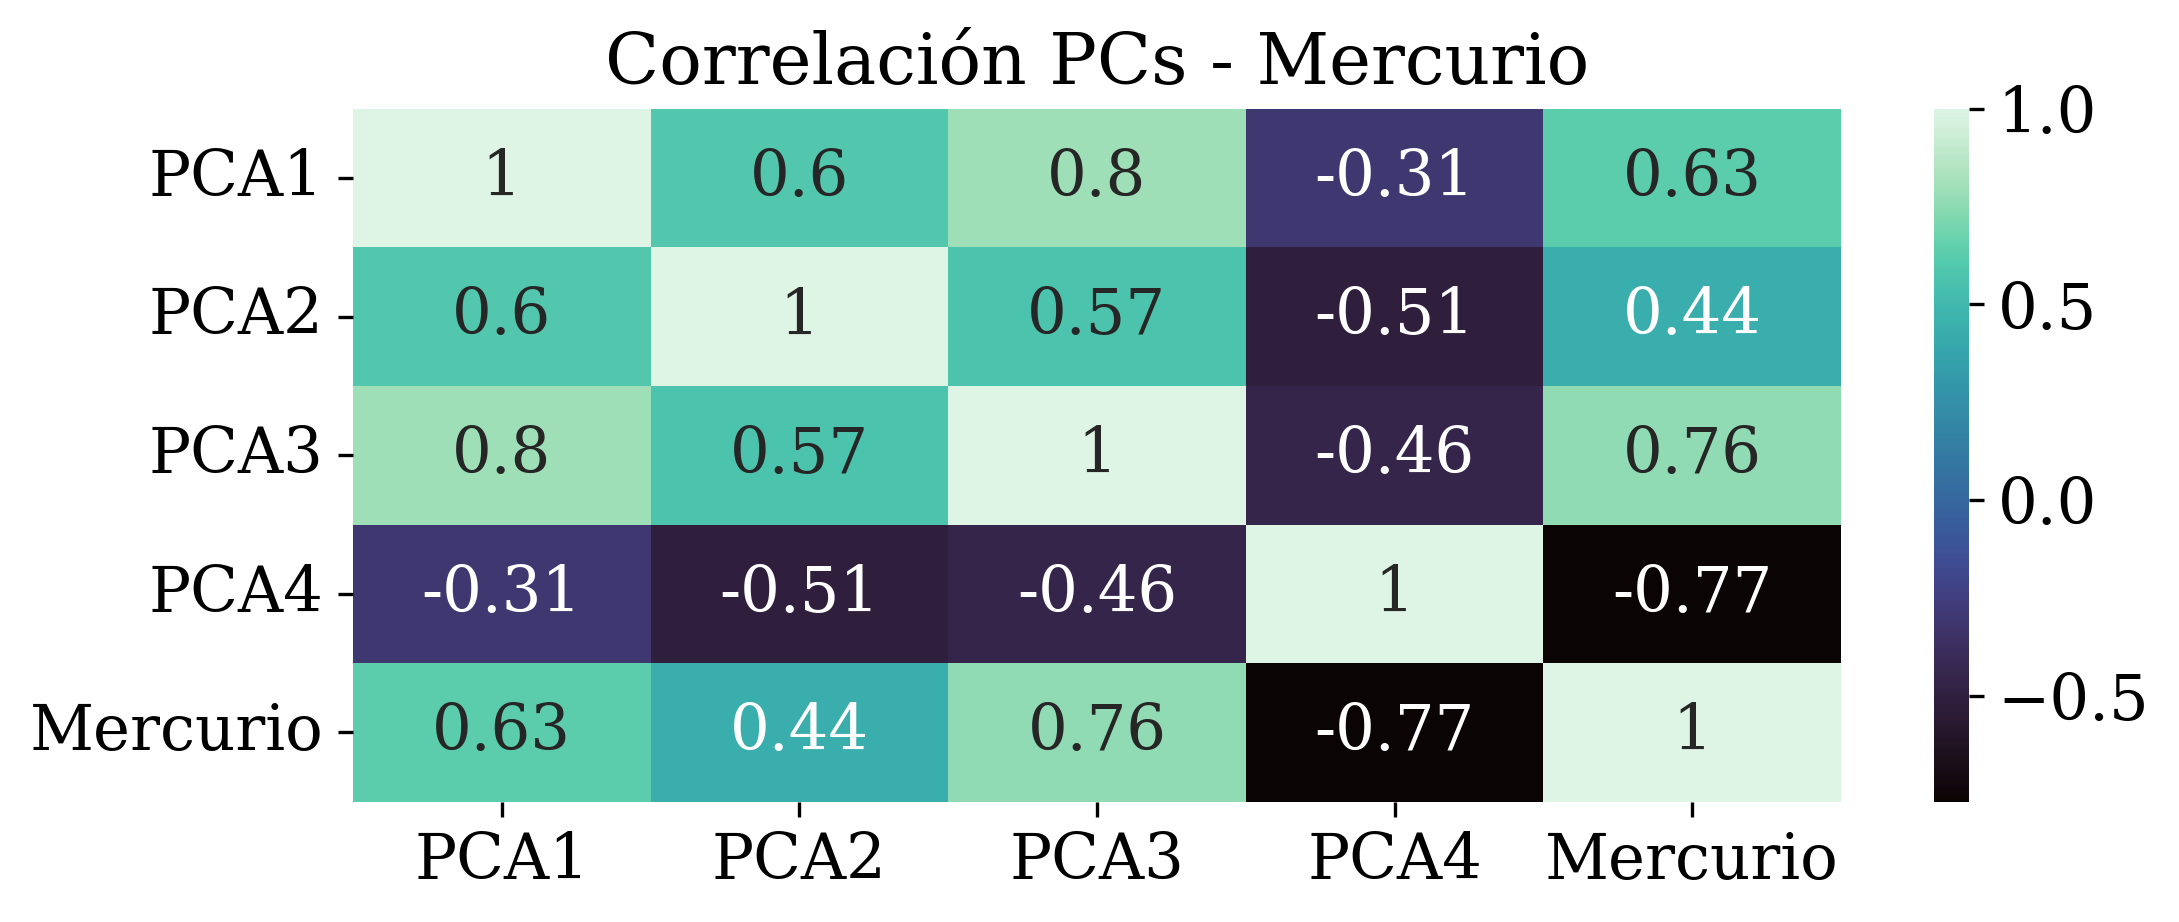

In [45]:
dummy = PCA.loc[:,PCA.columns[0:4]]
dummy["Mercurio"] = df.Estimacion
colormap = "mako"
fig, ax = plt.subplots(figsize=(8,3))
sns.heatmap(dummy.corr(), cmap=colormap, annot=True, ax = ax)
plt.title("Correlación PCs - Mercurio")
plt.show()

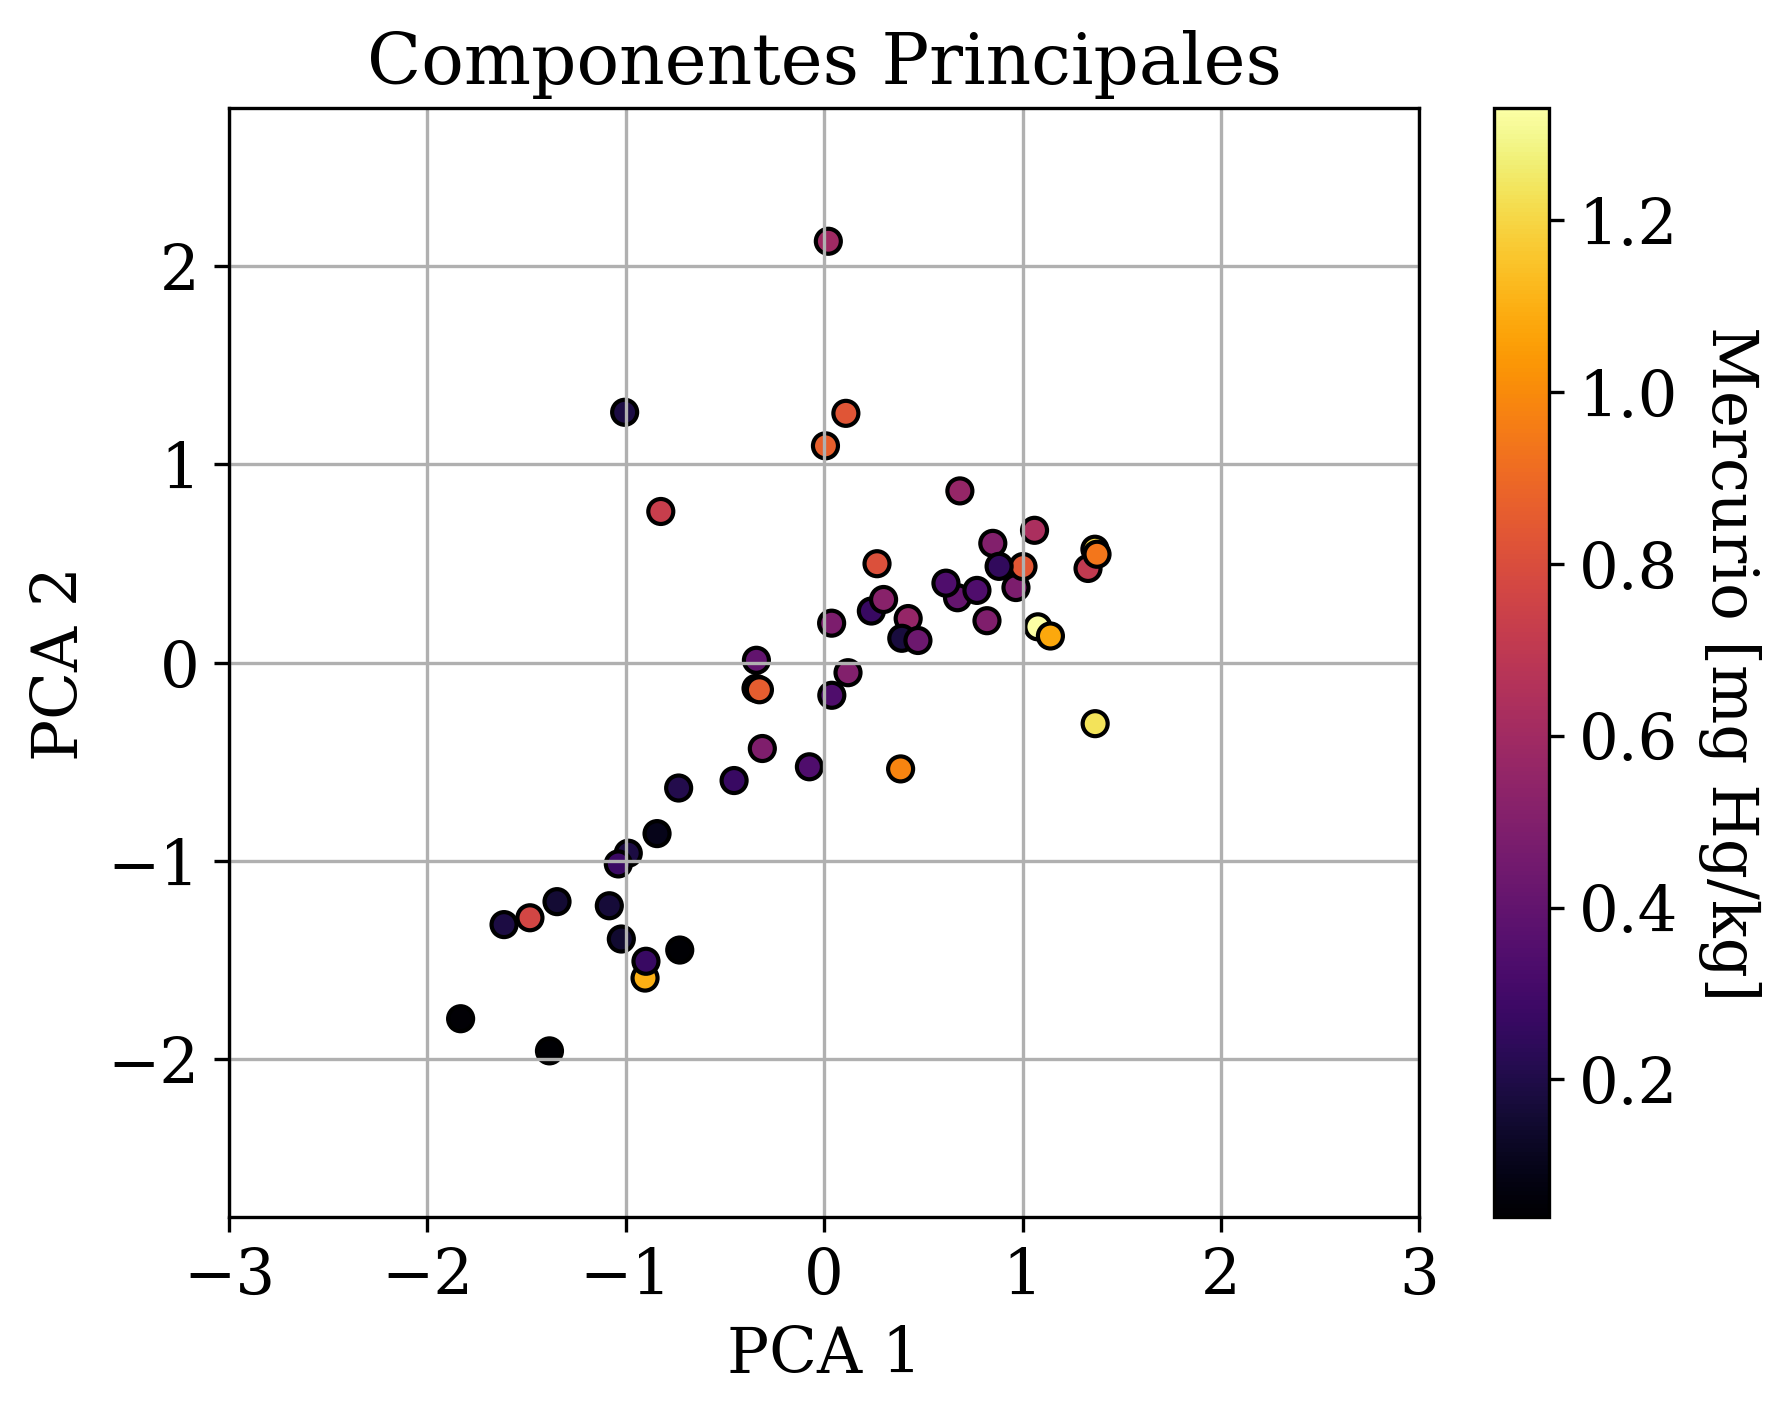

In [46]:
plt.scatter(PCA.PCA1, PCA.PCA2, c=df.Mercurio, cmap="inferno", edgecolor="k")

# plt.colorbar()
ax.set_figure
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel("Mercurio [mg Hg/kg]", rotation=270)

plt.title("Componentes Principales")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid()
plt.axis("equal")
plt.xlim([-3, 3])
plt.ylim([-3, 3])

plt.show()